In [1]:
import gc
import math
import itertools

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import scipy.stats as st
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN, OPTICS

import helpers as hp
import clustering as cl
import display as dp
import importlib #importlib.reload(foo)

In [2]:
MDIR = '/sanssauvegarde/homes/v18porti/info/'

In [3]:
df_ALL = pd.read_feather(MDIR + '550_32.feather')
print(df_ALL.shape)
df_ALL.info()

(120128063, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120128063 entries, 0 to 120128062
Data columns (total 4 columns):
vectorRRKLD_ALL       float32
vectorFAmpKLD_ALL     float32
vectorUFAmpKLD_ALL    float32
vectorCorrKLD_ALL     float32
dtypes: float32(4)
memory usage: 1.8 GB


In [4]:
random_state, n_components, n_features = 2, 3, 2
estimators = [
    ("Finite mixture with a Dirichlet distribution prior and concentration=", BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_distribution",
        #reg_covar=0, init_params='random',
        max_iter=100, #mean_precision_prior=.8,
        random_state=2), [0.001, 1, 1000]),
    ("Infinite mixture with a Dirichlet process prior and concentration=",
     BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_process",
        #reg_covar=0, init_params='random',
        max_iter=100, #mean_precision_prior=.8,
        random_state=2), [1, 1000, 100000])]
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue', 'darkorange', 'gold', 'tomato', 
                              'crimson', 'darkslategray', 'springgreen', 'chocolate'])


------------- shape: (30032015, 4) -----------------
 
RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (30006251, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (29977291, 4) && 99.82
variance ratio: [0.40304369 0.33606565 0.16375419 0.09713647]

 -> GAUSSIAN MIXTURE 5 components ----------------- 



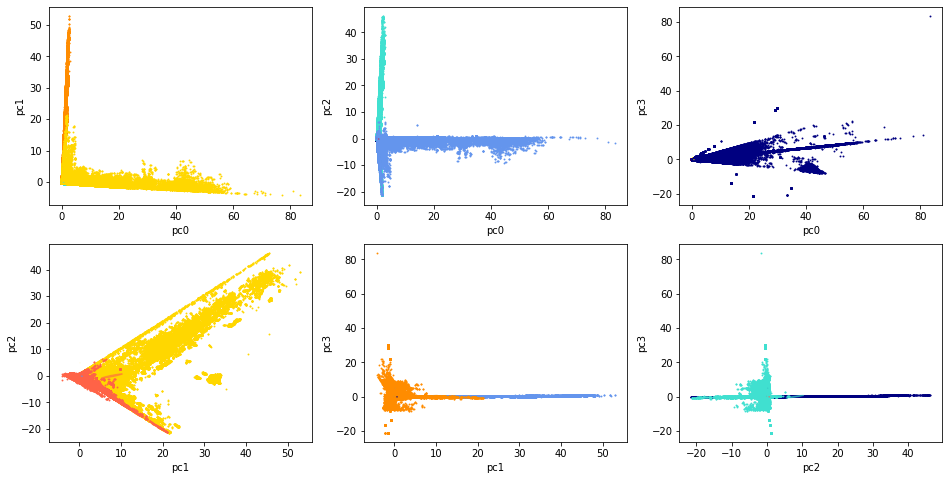

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 22945314, 'representativeness': 0.7654231998481784}, {'group': 1, 'qty': 1770611, 'representativeness': 0.05906507696109031}, {'group': 2, 'qty': 4355625, 'representativeness': 0.14529748535316284}, {'group': 3, 'qty': 531944, 'representativeness': 0.017744898963685543}, {'group': 4, 'qty': 373797, 'representativeness': 0.0124693388738829}]

 -> BAYESIAN MIXTURE ----------------- 

-- Finite mixture with a Dirichlet distribution prior and concentration=1.0e-03, components: 5, ---------- 

{'>50': 1, '>30': 0, '>15': 0, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 24616083, 'representativeness': 0.821157688998649}, {'group': 1, 'qty': 1375833, 'representativeness': 0.04589584162224666}, {'group': 2, 'qty': 2656999, 'representativeness': 0.08863372610954072}, {'group': 3, 'qty': 1302979, 'representativeness': 0.04346553529470024}, {'group': 4, 'qty': 25397, 'representativeness': 0.0008472079748633724}]


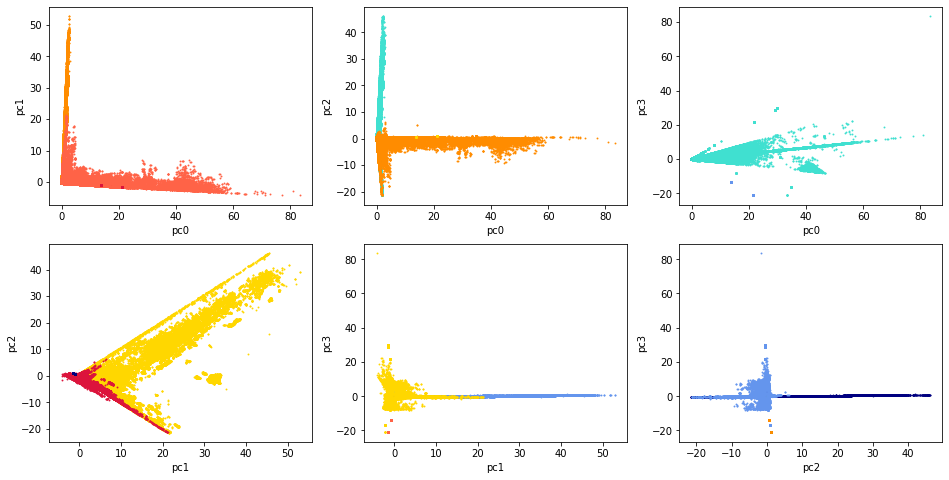

-- Finite mixture with a Dirichlet distribution prior and concentration=1.0e+00, components: 5, ---------- 

{'>50': 1, '>30': 0, '>15': 0, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 24616083, 'representativeness': 0.821157688998649}, {'group': 1, 'qty': 1375833, 'representativeness': 0.04589584162224666}, {'group': 2, 'qty': 2656999, 'representativeness': 0.08863372610954072}, {'group': 3, 'qty': 1302979, 'representativeness': 0.04346553529470024}, {'group': 4, 'qty': 25397, 'representativeness': 0.0008472079748633724}]


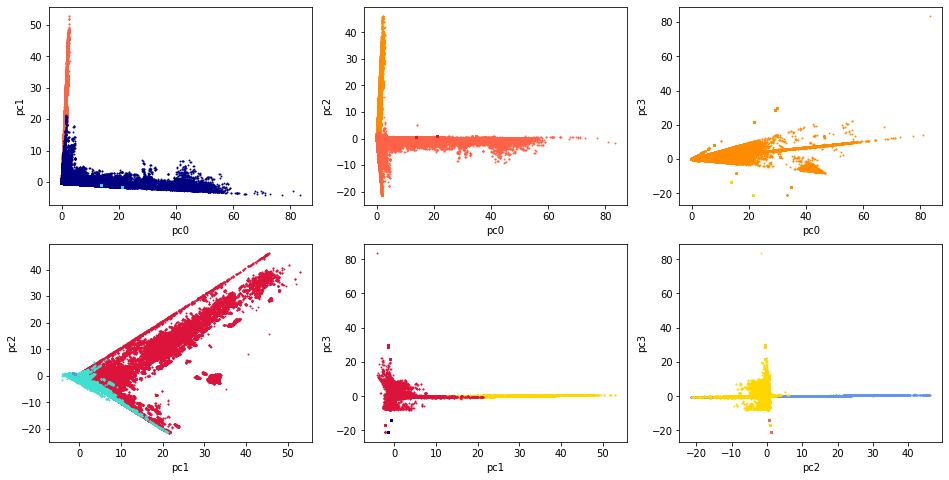

-- Finite mixture with a Dirichlet distribution prior and concentration=1.0e+03, components: 5, ---------- 

{'>50': 1, '>30': 0, '>15': 0, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 24615887, 'representativeness': 0.8211511507160537}, {'group': 1, 'qty': 1375936, 'representativeness': 0.04589927755646766}, {'group': 2, 'qty': 2657070, 'representativeness': 0.08863609456905229}, {'group': 3, 'qty': 1303001, 'representativeness': 0.043466269183562986}, {'group': 4, 'qty': 25397, 'representativeness': 0.0008472079748633724}]


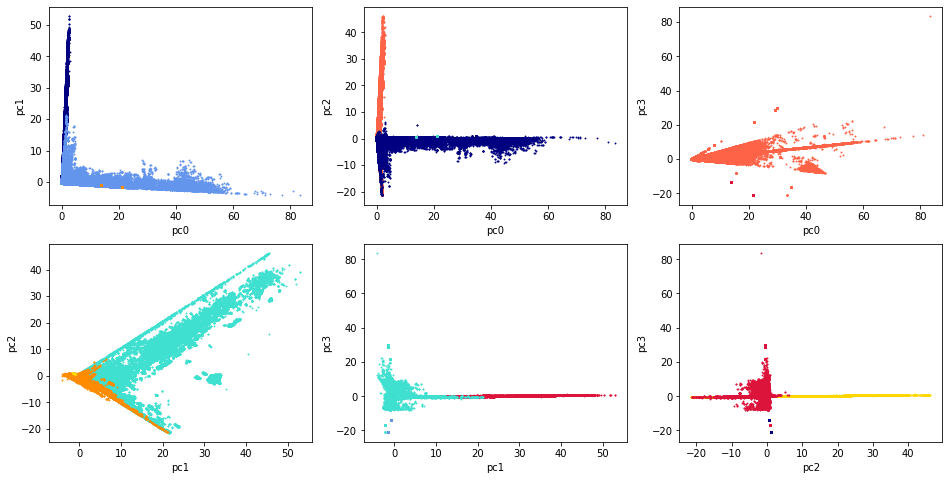

-- Infinite mixture with a Dirichlet process prior and concentration=1.0e+00, components: 5, ---------- 

{'>50': 1, '>30': 0, '>15': 0, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 24616083, 'representativeness': 0.821157688998649}, {'group': 1, 'qty': 1375833, 'representativeness': 0.04589584162224666}, {'group': 2, 'qty': 2656999, 'representativeness': 0.08863372610954072}, {'group': 3, 'qty': 1302979, 'representativeness': 0.04346553529470024}, {'group': 4, 'qty': 25397, 'representativeness': 0.0008472079748633724}]


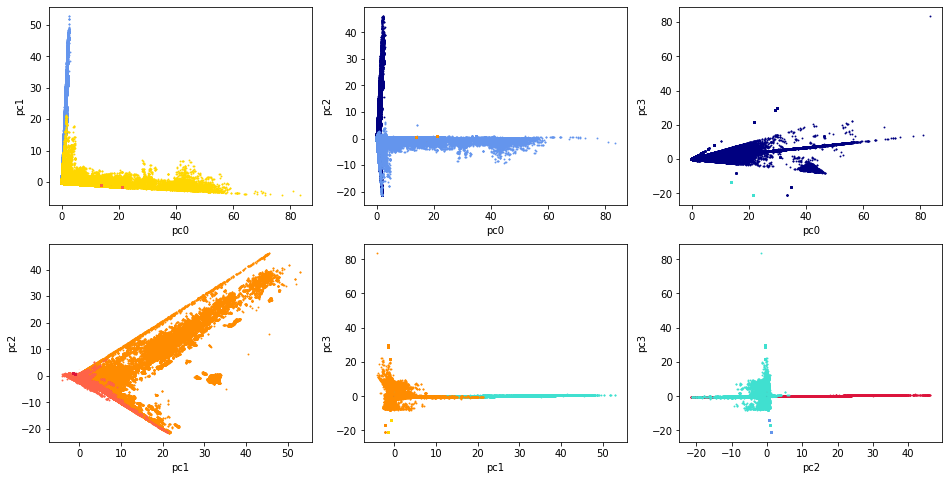

-- Infinite mixture with a Dirichlet process prior and concentration=1.0e+03, components: 5, ---------- 

{'>50': 1, '>30': 0, '>15': 0, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 24616083, 'representativeness': 0.821157688998649}, {'group': 1, 'qty': 1375833, 'representativeness': 0.04589584162224666}, {'group': 2, 'qty': 2656999, 'representativeness': 0.08863372610954072}, {'group': 3, 'qty': 1302979, 'representativeness': 0.04346553529470024}, {'group': 4, 'qty': 25397, 'representativeness': 0.0008472079748633724}]


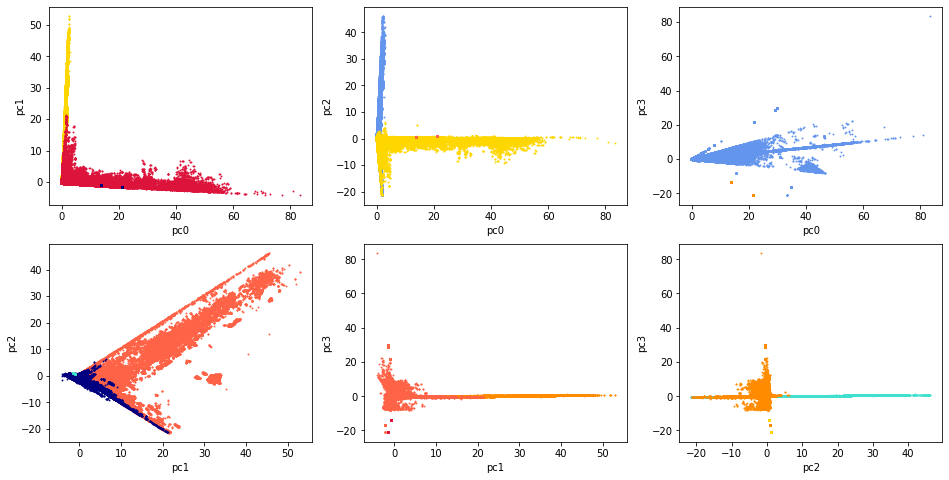

-- Infinite mixture with a Dirichlet process prior and concentration=1.0e+05, components: 5, ---------- 

{'>50': 1, '>30': 0, '>15': 0, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 24616083, 'representativeness': 0.821157688998649}, {'group': 1, 'qty': 1375833, 'representativeness': 0.04589584162224666}, {'group': 2, 'qty': 2656999, 'representativeness': 0.08863372610954072}, {'group': 3, 'qty': 1302979, 'representativeness': 0.04346553529470024}, {'group': 4, 'qty': 25397, 'representativeness': 0.0008472079748633724}]


MemoryError: Unable to allocate array with shape (29977291, 5) and data type float64

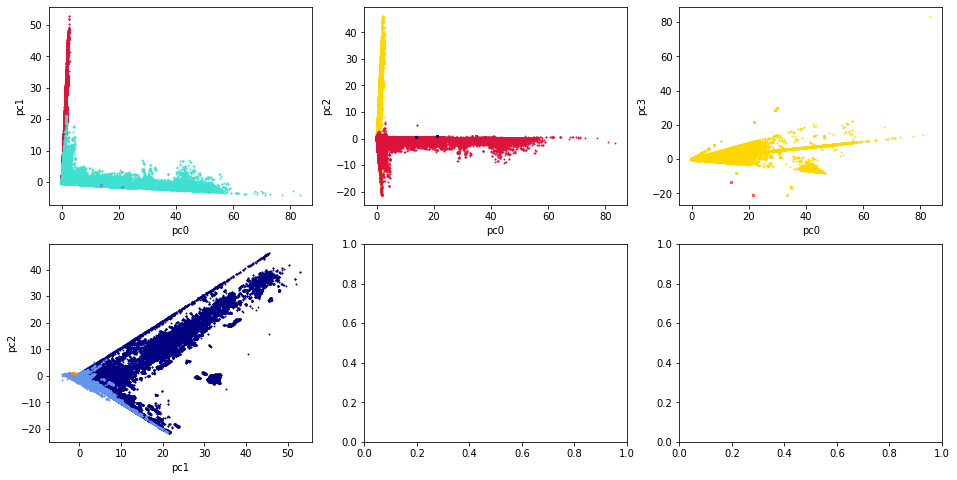

In [5]:
df_DIV = hp.getRandomRows(df_ALL, 0.20)
del df_ALL; gc.collect()
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')
df_DIV = cl.cleanData(df_DIV, 'mean')
UFAMP_limit = 1e+6
threshold = 20
RRKLD_limit = pow(10, 4*(0+1)) * 2
print(f'RRKLD_limit={RRKLD_limit}, UFAMP_limit={UFAMP_limit}, threshold={threshold}')
df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCA(df_DIV, threshold, UFAMP_limit, RRKLD_limit)
del df_nout, Xnorm ; gc.collect()
if printPCA: dp.printPCAScatter(dfPca, titPca)
del dfPca; gc.collect()
bic = []
for comp in range(5, 10):
    print(f'\n -> GAUSSIAN MIXTURE { comp } components ----------------- \n')
    gmm = GaussianMixture(n_components=comp, covariance_type='full').fit(Xpca)
    dp.printPCAGMM(gmm, Xpca, titPca, color_iter)
    print(hp.getRepresentativeness(gmm, Xpca, gmm.predict(Xpca)))
    bic.append(gmm.bic(Xpca))
    del gmm; gc.collect()
    print(f'\n -> BAYESIAN MIXTURE ----------------- \n')
    for (title, estimator, concentrations_prior) in estimators:
        for k, concentration in enumerate(concentrations_prior):
            print(f'-- { r"%s%.1e" % (title, concentration) }, components: { comp }, ---------- \n')
            estimator.weight_concentration_prior = concentration
            estimator.n_components = comp
            estimator.fit(Xpca)
            print(hp.getRepresentativeness(estimator, Xpca, estimator.predict(Xpca)))
            dp.printPCAGMM(estimator, Xpca, titPca, color_iter)
del Xpca, titPca; gc.collect();
del df_DIV; gc.collect()


------------- shape: (30032015, 4) -----------------
 
RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (29965584, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (29938409, 4) && 99.69
variance ratio: [0.43630743 0.31828122 0.18173114 0.06368021]

 -> GAUSSIAN MIXTURE ----------------- 

COMPONENTS: 5


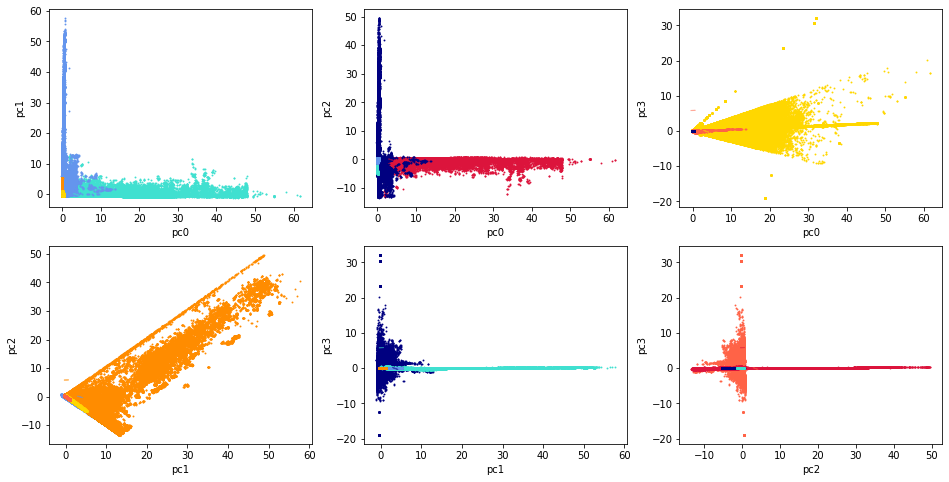

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 22013173, 'representativeness': 0.7352819917718406}, {'group': 1, 'qty': 1252413, 'representativeness': 0.0418329845116352}, {'group': 2, 'qty': 379894, 'representativeness': 0.012689184652397528}, {'group': 3, 'qty': 3379665, 'representativeness': 0.11288726131037892}, {'group': 4, 'qty': 2913264, 'representativeness': 0.0973085777537477}]
COMPONENTS: 6


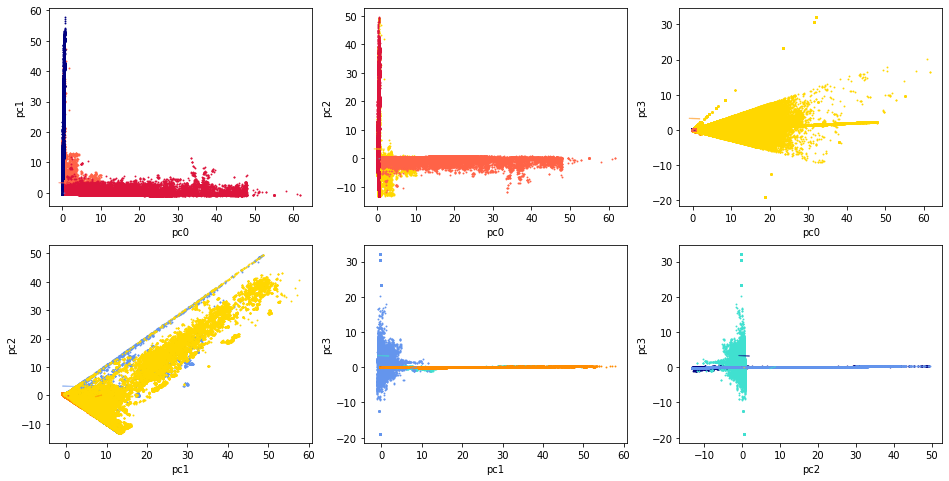

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 1681313, 'representativeness': 0.05615906309516982}, {'group': 1, 'qty': 22551850, 'representativeness': 0.7532748316719169}, {'group': 2, 'qty': 4483293, 'representativeness': 0.14975054285616848}, {'group': 3, 'qty': 115969, 'representativeness': 0.0038735859343761387}, {'group': 4, 'qty': 423958, 'representativeness': 0.014161006351406316}, {'group': 5, 'qty': 682026, 'representativeness': 0.022780970090962416}]
COMPONENTS: 7


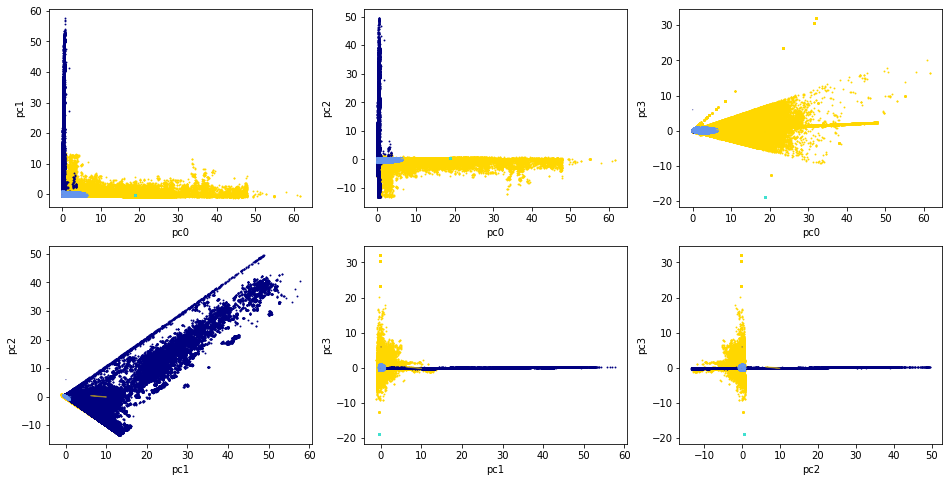

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 4}
[{'group': 0, 'qty': 21514891, 'representativeness': 0.7186384219682482}, {'group': 1, 'qty': 365151, 'representativeness': 0.012196740314423521}, {'group': 2, 'qty': 3632929, 'representativeness': 0.1213467622811887}, {'group': 3, 'qty': 2840273, 'representativeness': 0.09487053904567874}, {'group': 4, 'qty': 404107, 'representativeness': 0.013497945064482217}, {'group': 5, 'qty': 12657, 'representativeness': 0.00042276795670738546}, {'group': 6, 'qty': 1168401, 'representativeness': 0.03902682336927123}]
COMPONENTS: 8


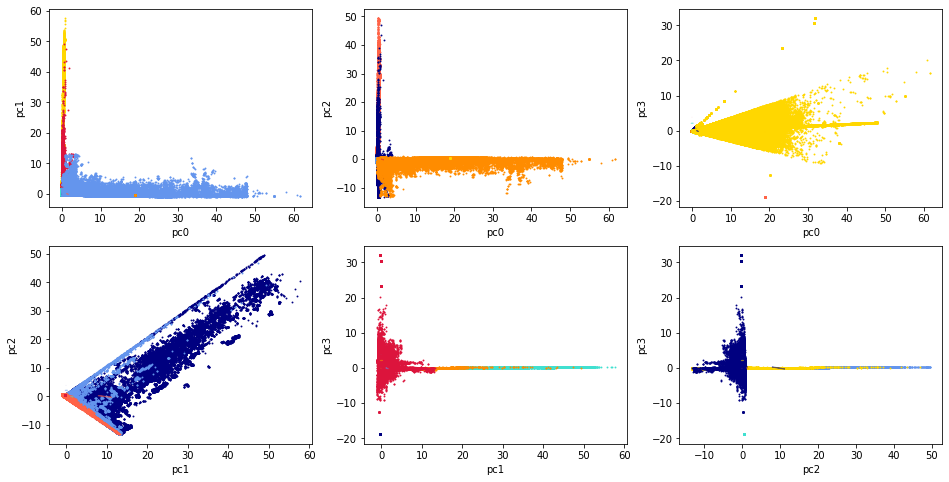

{'>50': 1, '>30': 0, '>15': 1, '>05': 1, '<05': 5}
[{'group': 0, 'qty': 17923846, 'representativeness': 0.5986906652253966}, {'group': 1, 'qty': 727750, 'representativeness': 0.024308238958189128}, {'group': 2, 'qty': 1005561, 'representativeness': 0.0335876565785443}, {'group': 3, 'qty': 151554, 'representativeness': 0.005062192850662171}, {'group': 4, 'qty': 2424838, 'representativeness': 0.08099421716097205}, {'group': 5, 'qty': 7406225, 'representativeness': 0.24738205026192273}, {'group': 6, 'qty': 285978, 'representativeness': 0.009552211007605648}, {'group': 7, 'qty': 12657, 'representativeness': 0.00042276795670738546}]
COMPONENTS: 9


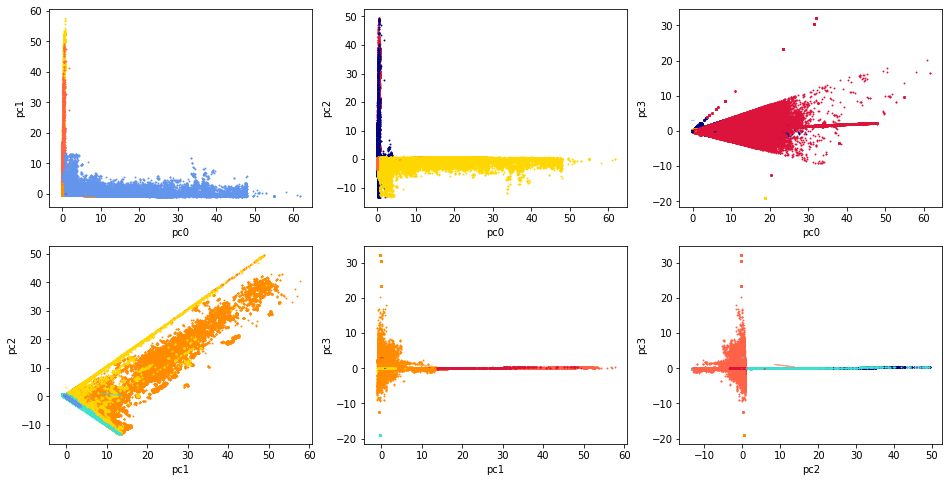

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 6}
[{'group': 0, 'qty': 22284882, 'representativeness': 0.7443575909461321}, {'group': 1, 'qty': 405739, 'representativeness': 0.013552456979260321}, {'group': 2, 'qty': 586118, 'representativeness': 0.019577459844309027}, {'group': 3, 'qty': 91148, 'representativeness': 0.00304451716188392}, {'group': 4, 'qty': 950480, 'representativeness': 0.031747846052874756}, {'group': 5, 'qty': 12657, 'representativeness': 0.00042276795670738546}, {'group': 6, 'qty': 2188947, 'representativeness': 0.07311500754766227}, {'group': 7, 'qty': 76505, 'representativeness': 0.002555413014766416}, {'group': 8, 'qty': 3341933, 'representativeness': 0.1116269404964038}]
[-6.14660994e+08 -6.09790760e+08 -6.23972998e+08 -6.28489264e+08
 -6.26902338e+08]
RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (29965584, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (29962

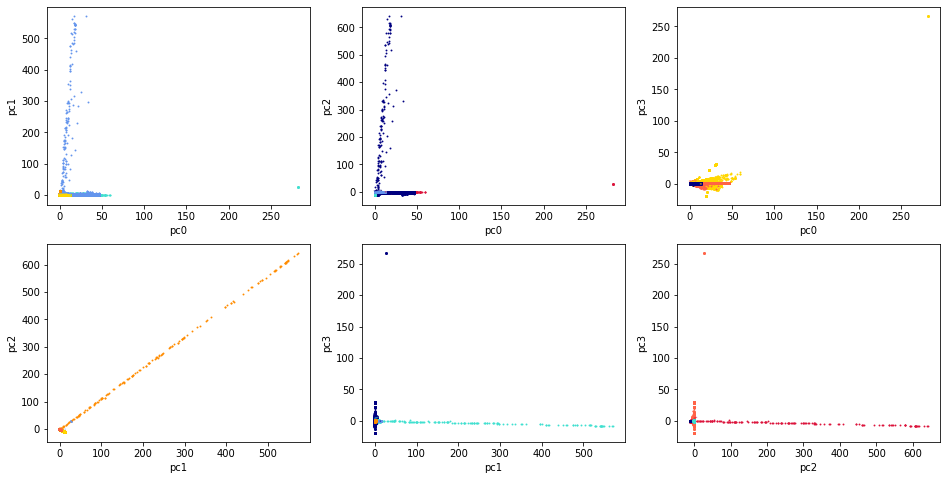

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 24615686, 'representativeness': 0.8215448410641224}, {'group': 1, 'qty': 159991, 'representativeness': 0.005339675711929784}, {'group': 2, 'qty': 33630, 'representativeness': 0.0011223962234888126}, {'group': 3, 'qty': 3639092, 'representativeness': 0.1214541515827639}, {'group': 4, 'qty': 1514282, 'representativeness': 0.0505389354176951}]
COMPONENTS: 6


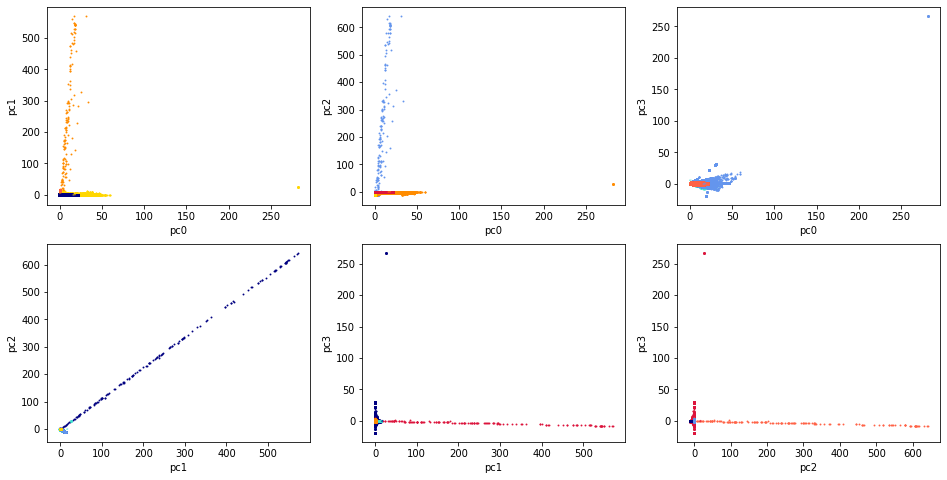

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 23970495, 'representativeness': 0.8000116878726573}, {'group': 1, 'qty': 37725, 'representativeness': 0.0012590662364292435}, {'group': 2, 'qty': 65755, 'representativeness': 0.002194563296922595}, {'group': 3, 'qty': 2756487, 'representativeness': 0.09199734162640519}, {'group': 4, 'qty': 1806341, 'representativeness': 0.06028636089006855}, {'group': 5, 'qty': 1325878, 'representativeness': 0.04425098007751709}]
COMPONENTS: 7


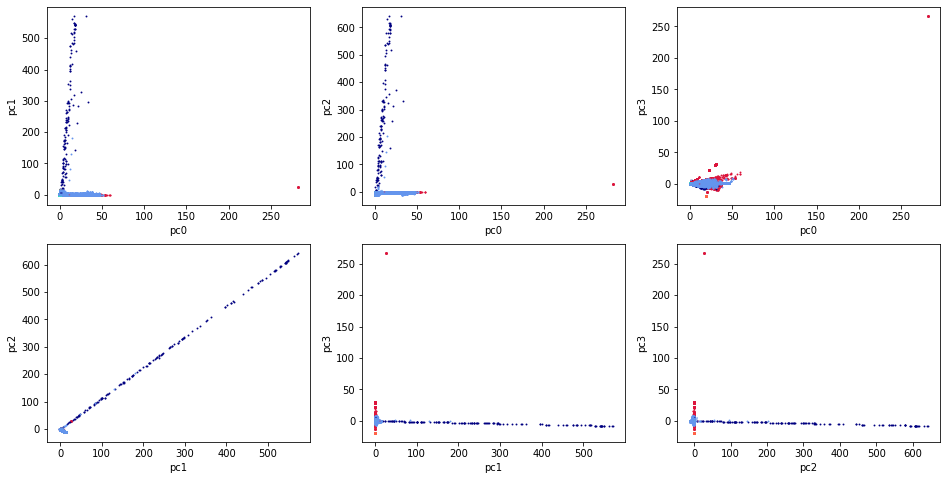

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 4}
[{'group': 0, 'qty': 24534836, 'representativeness': 0.8188464843983755}, {'group': 1, 'qty': 3619197, 'representativeness': 0.120790158931372}, {'group': 2, 'qty': 12657, 'representativeness': 0.0004224254832202766}, {'group': 3, 'qty': 161156, 'representativeness': 0.005378557412802946}, {'group': 4, 'qty': 12960, 'representativeness': 0.0004325380629323524}, {'group': 5, 'qty': 1585683, 'representativeness': 0.05292193312073776}, {'group': 6, 'qty': 36192, 'representativeness': 0.001207902590559236}]
COMPONENTS: 8


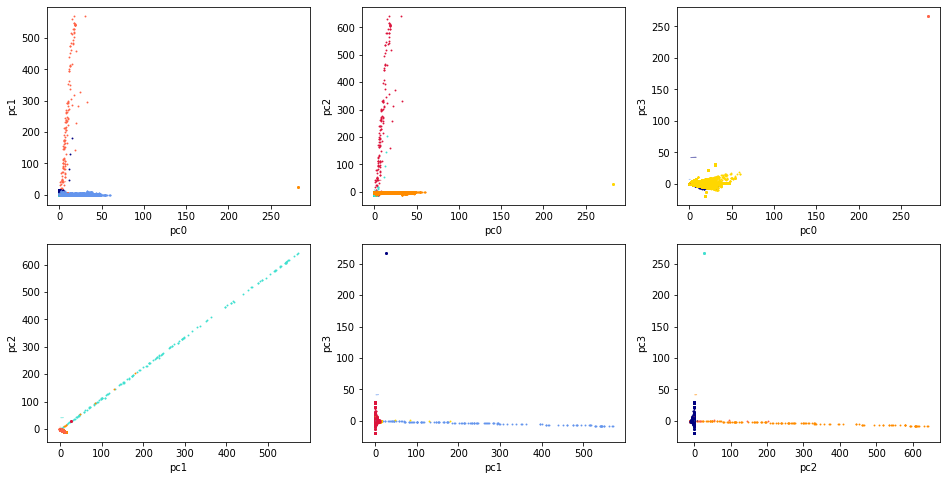

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 5}
[{'group': 0, 'qty': 23922031, 'representativeness': 0.7983942091163337}, {'group': 1, 'qty': 1108597, 'representativeness': 0.03699925917844268}, {'group': 2, 'qty': 1311, 'representativeness': 4.37544290512588e-05}, {'group': 3, 'qty': 2752557, 'representativeness': 0.09186617846380302}, {'group': 4, 'qty': 24293, 'representativeness': 0.0008107752440444164}, {'group': 5, 'qty': 1813900, 'representativeness': 0.06053864138526189}, {'group': 6, 'qty': 339974, 'representativeness': 0.011346581435753362}, {'group': 7, 'qty': 18, 'representativeness': 6.007473096282672e-07}]
COMPONENTS: 9


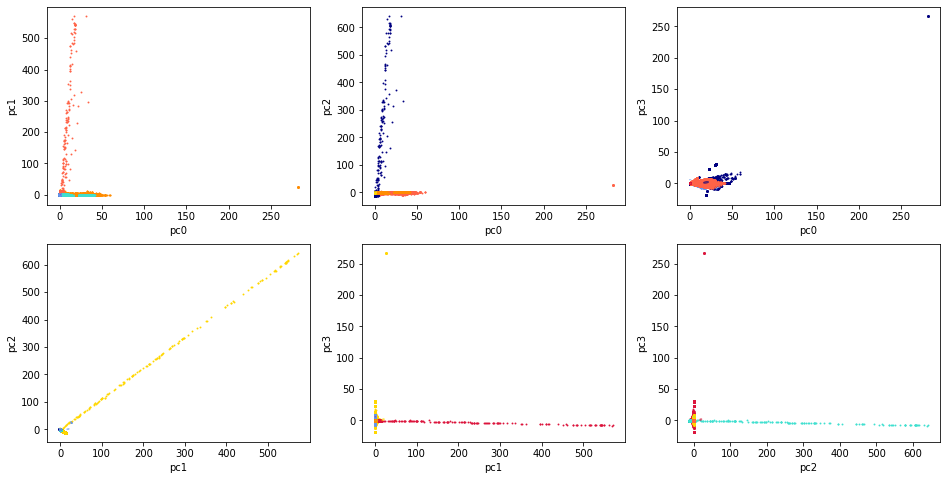

{'>50': 1, '>30': 0, '>15': 0, '>05': 3, '<05': 5}
[{'group': 0, 'qty': 23177539, 'representativeness': 0.7735468998919022}, {'group': 1, 'qty': 14652, 'representativeness': 0.0004890083100374096}, {'group': 2, 'qty': 2031247, 'representativeness': 0.0677925650244716}, {'group': 3, 'qty': 39415, 'representativeness': 0.0013154697338332308}, {'group': 4, 'qty': 1531193, 'representativeness': 0.05110333751509086}, {'group': 5, 'qty': 1031800, 'representativeness': 0.034436170781913675}, {'group': 6, 'qty': 360708, 'representativeness': 0.012038575586744057}, {'group': 7, 'qty': 1763470, 'representativeness': 0.05885554767278669}, {'group': 8, 'qty': 12657, 'representativeness': 0.0004224254832202766}]
[-8.06566828e+08 -8.23402877e+08 -8.08007579e+08 -8.26206719e+08
 -8.35753062e+08]
RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (30006142, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (29977416, 

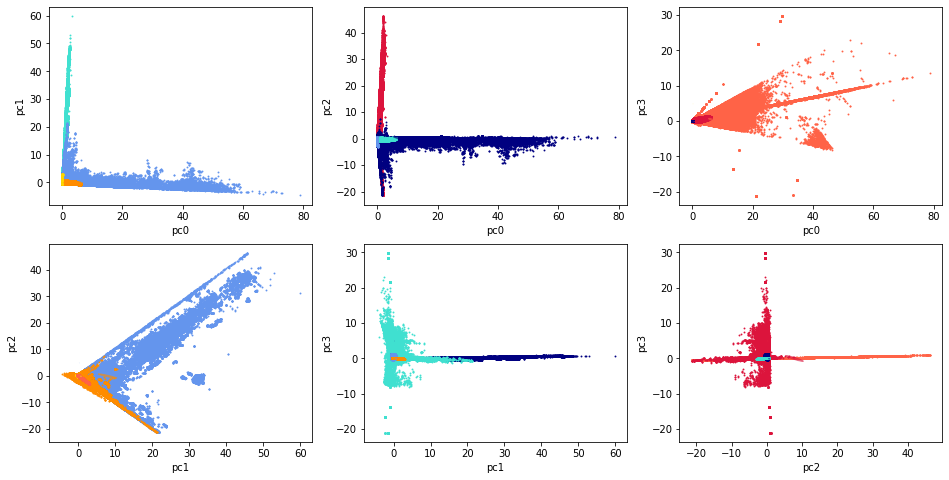

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 2}
[{'group': 0, 'qty': 22934848, 'representativeness': 0.7650708786908118}, {'group': 1, 'qty': 532098, 'representativeness': 0.01774996217152272}, {'group': 2, 'qty': 375794, 'representativeness': 0.012535903694968238}, {'group': 3, 'qty': 1776569, 'representativeness': 0.05926358028990891}, {'group': 4, 'qty': 4358107, 'representativeness': 0.14537967515278835}]
COMPONENTS: 6


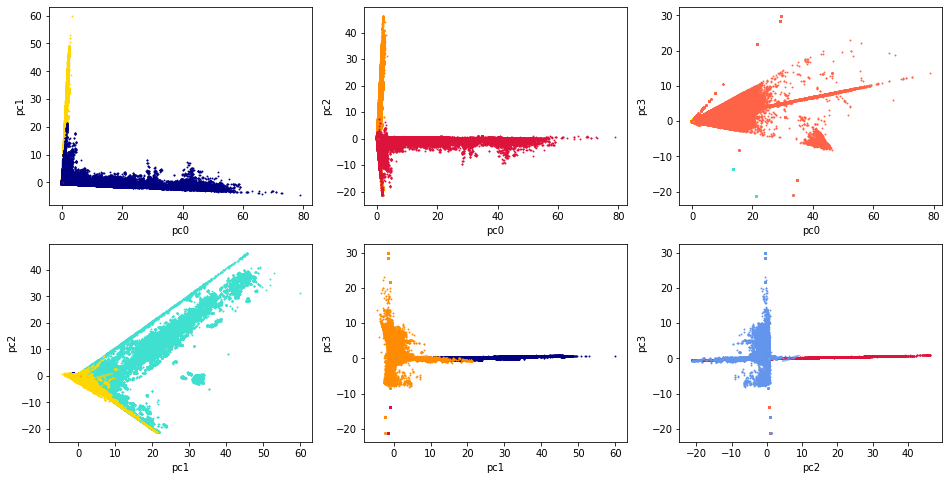

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 3}
[{'group': 0, 'qty': 22861165, 'representativeness': 0.7626129283457921}, {'group': 1, 'qty': 25302, 'representativeness': 0.0008440353898414726}, {'group': 2, 'qty': 529293, 'representativeness': 0.01765639173169562}, {'group': 3, 'qty': 4401325, 'representativeness': 0.1468213604534827}, {'group': 4, 'qty': 1774096, 'representativeness': 0.05918108485401143}, {'group': 5, 'qty': 386235, 'representativeness': 0.012884199225176713}]
COMPONENTS: 7


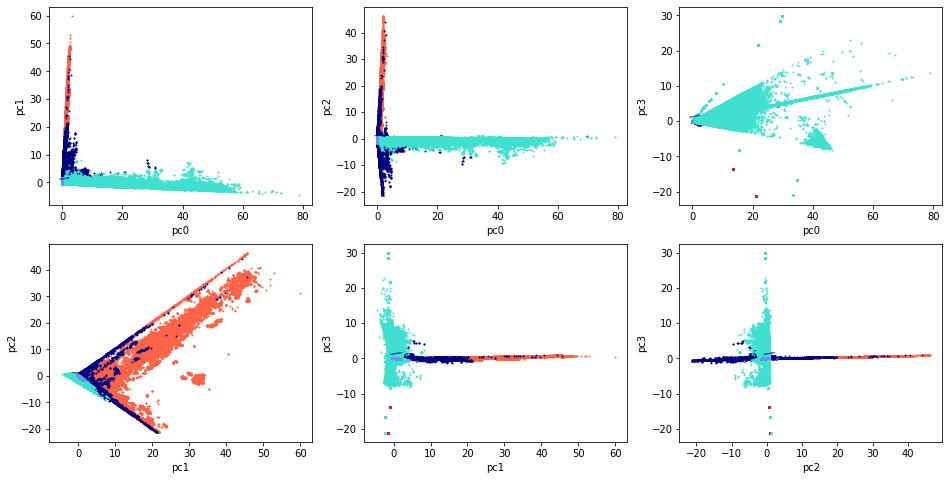

{'>50': 1, '>30': 0, '>15': 1, '>05': 1, '<05': 4}
[{'group': 0, 'qty': 2255886, 'representativeness': 0.07525285034574028}, {'group': 1, 'qty': 18120738, 'representativeness': 0.6044796522822381}, {'group': 2, 'qty': 754988, 'representativeness': 0.02518522610487842}, {'group': 3, 'qty': 25302, 'representativeness': 0.0008440353898414726}, {'group': 4, 'qty': 139282, 'representativeness': 0.00464623101604221}, {'group': 5, 'qty': 1183491, 'representativeness': 0.03947942010745689}, {'group': 6, 'qty': 7497729, 'representativeness': 0.25011258475380266}]
COMPONENTS: 8


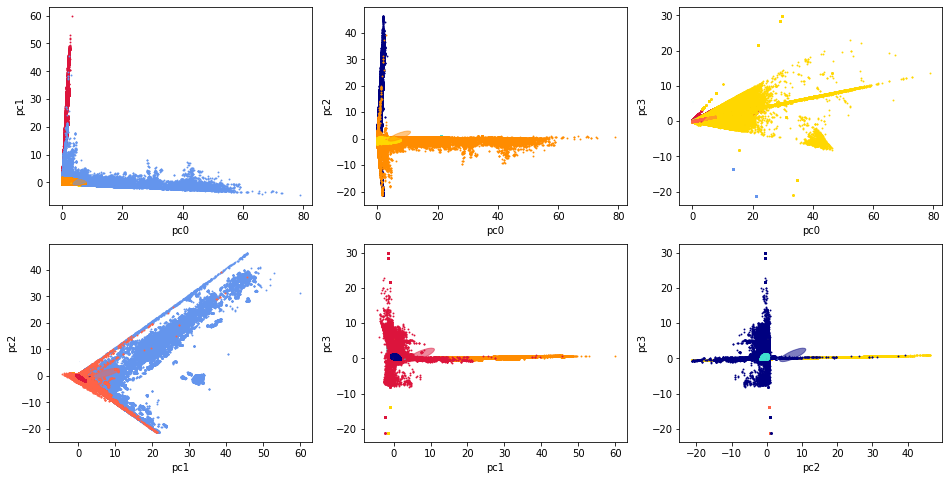

{'>50': 1, '>30': 0, '>15': 0, '>05': 2, '<05': 5}
[{'group': 0, 'qty': 22382749, 'representativeness': 0.7466537142494203}, {'group': 1, 'qty': 651434, 'representativeness': 0.021730825632202588}, {'group': 2, 'qty': 3776884, 'representativeness': 0.12599097934258244}, {'group': 3, 'qty': 468141, 'representativeness': 0.015616456068128087}, {'group': 4, 'qty': 25302, 'representativeness': 0.0008440353898414726}, {'group': 5, 'qty': 1713062, 'representativeness': 0.0571450854870213}, {'group': 6, 'qty': 116770, 'representativeness': 0.0038952656893442715}, {'group': 7, 'qty': 843074, 'representativeness': 0.02812363814145956}]
COMPONENTS: 9


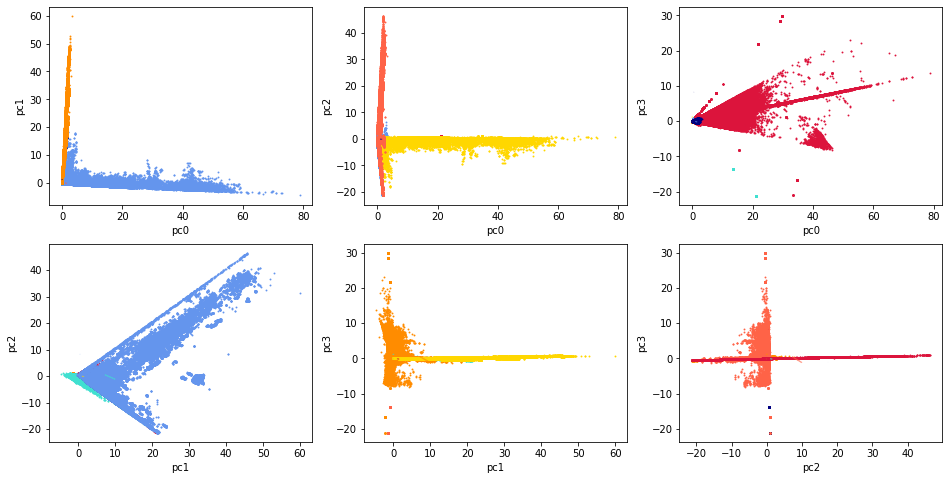

{'>50': 1, '>30': 1, '>15': 0, '>05': 2, '<05': 5}
[{'group': 0, 'qty': 15467604, 'representativeness': 0.5159752261502459}, {'group': 1, 'qty': 1529901, 'representativeness': 0.05103511923776219}, {'group': 2, 'qty': 25302, 'representativeness': 0.0008440353898414726}, {'group': 3, 'qty': 987270, 'representativeness': 0.032933792559038444}, {'group': 4, 'qty': 9038077, 'representativeness': 0.30149619967244673}, {'group': 5, 'qty': 195176, 'representativeness': 0.006510767972796588}, {'group': 6, 'qty': 2200362, 'representativeness': 0.07340065601384722}, {'group': 7, 'qty': 273025, 'representativeness': 0.00910768960206577}, {'group': 8, 'qty': 260699, 'representativeness': 0.00869651340195566}]
[-6.35940467e+08 -6.37664271e+08 -6.52907246e+08 -6.56659316e+08
 -6.66483063e+08]
RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (30006142, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (3000

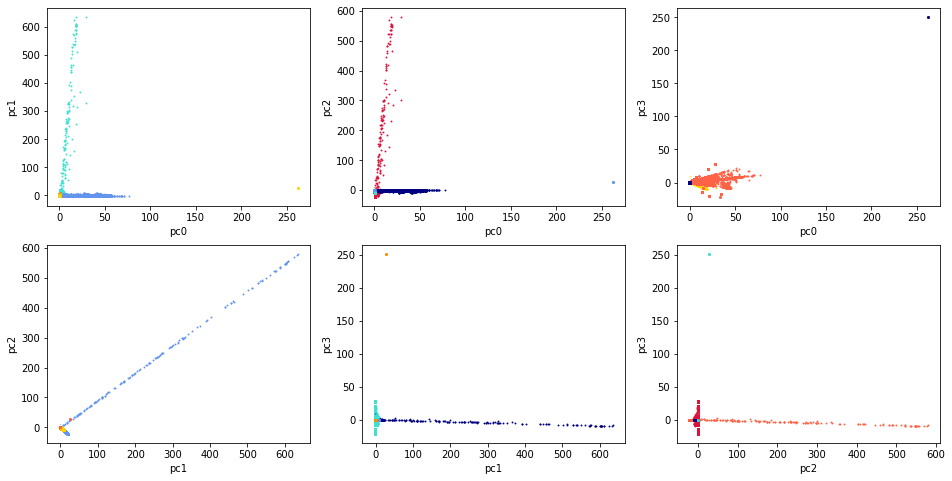

{'>50': 1, '>30': 0, '>15': 0, '>05': 1, '<05': 3}
[{'group': 0, 'qty': 24508122, 'representativeness': 0.8168529374062722}, {'group': 1, 'qty': 57876, 'representativeness': 0.001929000541344025}, {'group': 2, 'qty': 1311135, 'representativeness': 0.043699981421920976}, {'group': 3, 'qty': 3451263, 'representativeness': 0.11503020587671235}, {'group': 4, 'qty': 674706, 'representativeness': 0.022487874753750463}]
COMPONENTS: 6


In [ ]:
df_DIV = hp.getRandomRows(df_ALL, 0.25)
del df_ALL; gc.collect()
printPCA = False
print(f'\n------------- shape: { df_DIV.shape } -----------------\n ')
df_DIV = cl.cleanData(df_DIV, 'mean')
UFAMP_limit = 1e+6
for t in range(2):
    threshold = 10 * (t + 1)
    for j in range(2):
        RRKLD_limit = pow(10, 4*(j*2+1)) * 2
        print(f'RRKLD_limit={RRKLD_limit}, UFAMP_limit={UFAMP_limit}, threshold={threshold}')
        df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCA(df_DIV, threshold, UFAMP_limit, RRKLD_limit)
        del df_nout, Xnorm ; gc.collect()
        if printPCA: dp.printPCAScatter(dfPca, titPca)
        del dfPca; gc.collect()
        print(f'\n -> GAUSSIAN MIXTURE ----------------- \n')
        bic = []
        for comp in range(5, 10):
            print(f'COMPONENTS: { comp }')
            gmm = GaussianMixture(n_components=comp, covariance_type='full').fit(Xpca)
            dp.printPCAGMM(gmm, Xpca, titPca, color_iter)
            print(hp.getRepresentativeness(gmm, Xpca, gmm.predict(Xpca)))
            bic.append(gmm.bic(Xpca))
            del gmm; gc.collect()
        print(np.array(bic)); 
        del bic; gc.collect();
        """print(f'\n -> BAYESIAN MIXTURE ----------------- \n')
        for comp in range(5, 10):
            for (title, estimator, concentrations_prior) in estimators:
                for k, concentration in enumerate(concentrations_prior):
                    print(f'-- { r"%s%.1e" % (title, concentration) }, components: { comp }, ----------')
                    estimator.weight_concentration_prior = concentration
                    estimator.fit(Xpca)
                    print(hp.getRepresentativeness(estimator, Xpca, estimator.predict(Xpca)))
                    dp.printPCAGMM(estimator, Xpca, titPca, color_iter)"""
        del Xpca, titPca; gc.collect();
del df_DIV; gc.collect()

In [ ]:
X = df_DIV.to_numpy() # SSLLLLOOOOOOOOOOOOOOOOOOOOOOOOOOWWWWWWWWWWWWWW
clustering = OPTICS().fit(X)

In [ ]:
clustering.labels_
clustering.reachability_
clustering.ordering_
clustering.core_distances_
clustering.predecessor_
clustering.cluster_hierarchy_

In [ ]:
ms, n_clusters_, cluster_centers, labels = cl.meanClustering(X, 150000000000000)
print(hp.getRepresentativenessKM(ms, X, ms.predict(X)))
dp.plotMSh(X, ms, n_clusters_, cluster_centers, labels)
print(cluster_centers)
print(n_clusters_)
print(labels)

In [5]:
X = df_DIV.to_numpy()
bandwidth2 = estimate_bandwidth(X, n_samples=50000, quantile=0.5)
bandwidth2

120749494051483.7

number of estimated clusters : 2298
{'>50': 1, '>30': 0, '>15': 0, '<15': 2297}
[{'group': 0, 'qty': 48046504, 'representativeness': 0.9999017506837755}, {'group': 1, 'qty': 1030, 'representativeness': 2.143545768083956e-05}, {'group': 2, 'qty': 361, 'representativeness': 7.512815750274837e-06}, {'group': 3, 'qty': 177, 'representativeness': 3.6835689412704878e-06}, {'group': 4, 'qty': 24, 'representativeness': 4.994669750875238e-07}, {'group': 5, 'qty': 17, 'representativeness': 3.5378910735366266e-07}, {'group': 6, 'qty': 18, 'representativeness': 3.7460023131564283e-07}, {'group': 7, 'qty': 14, 'representativeness': 2.913557354677222e-07}, {'group': 8, 'qty': 12, 'representativeness': 2.497334875437619e-07}, {'group': 9, 'qty': 14, 'representativeness': 2.913557354677222e-07}, {'group': 10, 'qty': 13, 'representativeness': 2.705446115057421e-07}, {'group': 11, 'qty': 14, 'representativeness': 2.913557354677222e-07}, {'group': 12, 'qty': 9, 'representativeness': 1.8730011565782141e-0

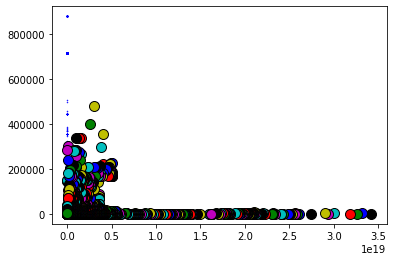

347061

In [6]:
ms, n_clusters_, cluster_centers, labels = cl.meanClustering(X, bandwidth2)
print(hp.getRepresentativenessKM(ms, X, ms.predict(X)))
dp.plotMSh(X, ms, n_clusters_, cluster_centers, labels)
del ms, n_clusters_, cluster_centers, labels, X, df_DIV; gc.collect()

1° time ------------- shape: (48051225, 4) ----------------- 
RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47943953, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47900004, 4) && 99.69
variance ratio: [0.43557014 0.3184052  0.18161298 0.06441168]


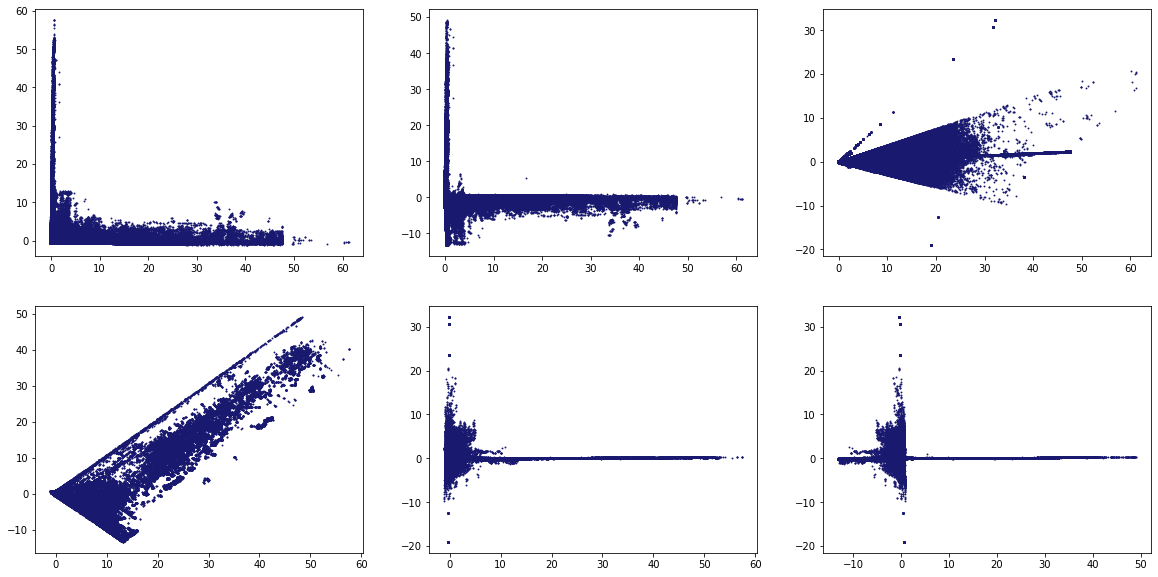

RRKLD_limit=200000000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47943953, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47936839, 4) && 99.76
variance ratio: [0.4355579  0.26099382 0.23903437 0.06441391]


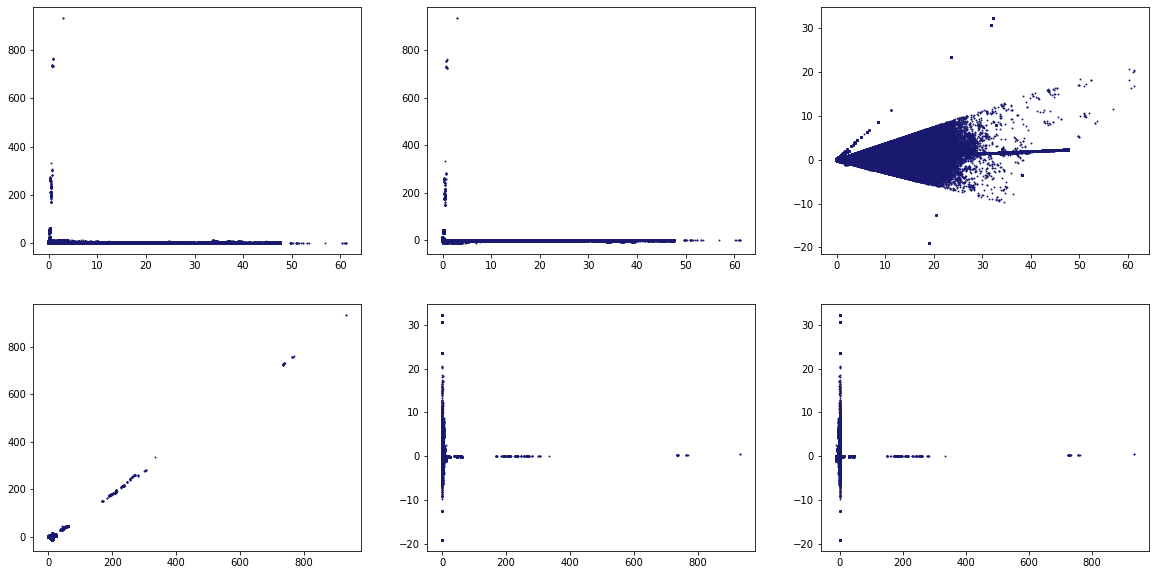

RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47943953, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47939325, 4) && 99.77
variance ratio: [0.42697452 0.25033764 0.24965707 0.07303077]


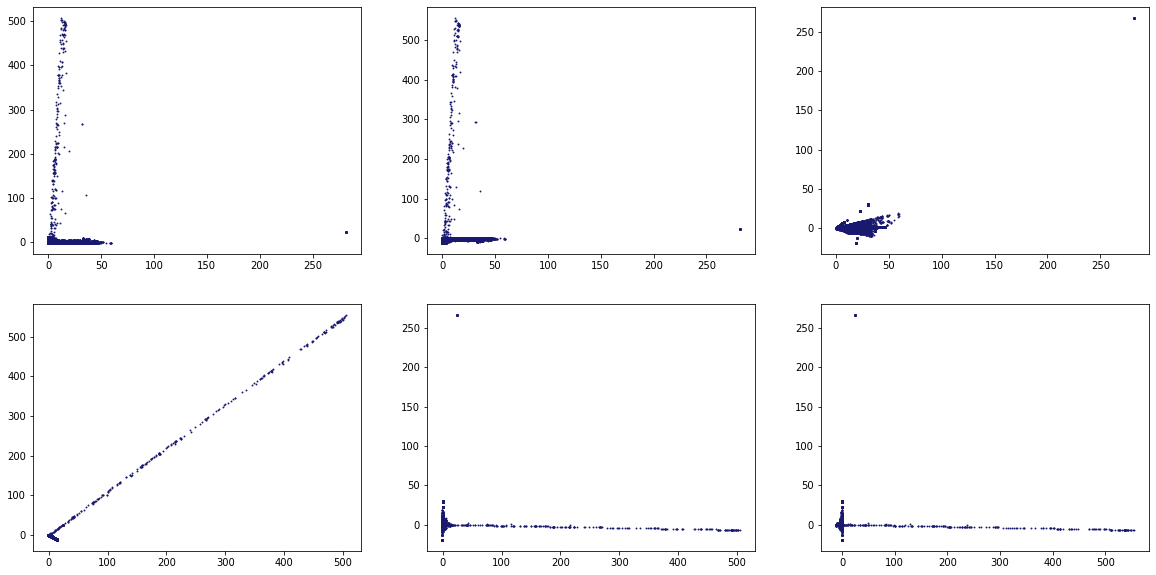

RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009371, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47963198, 4) && 99.82
variance ratio: [0.40312428 0.33608084 0.16374029 0.0970546 ]


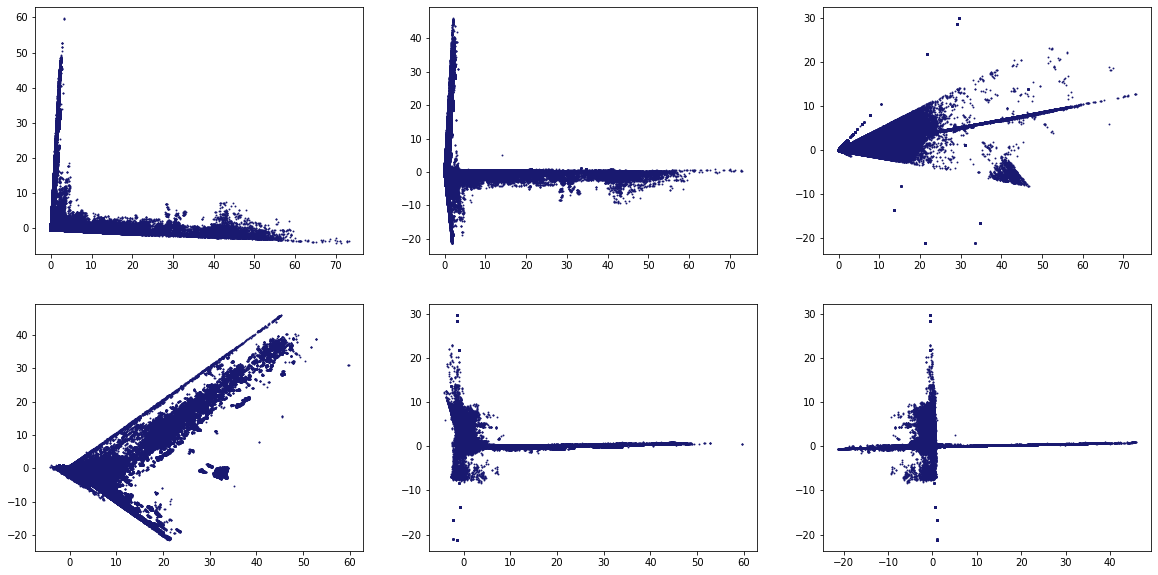

RRKLD_limit=200000000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009371, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (48002057, 4) && 99.9
variance ratio: [0.40299544 0.25931087 0.24062127 0.09707242]


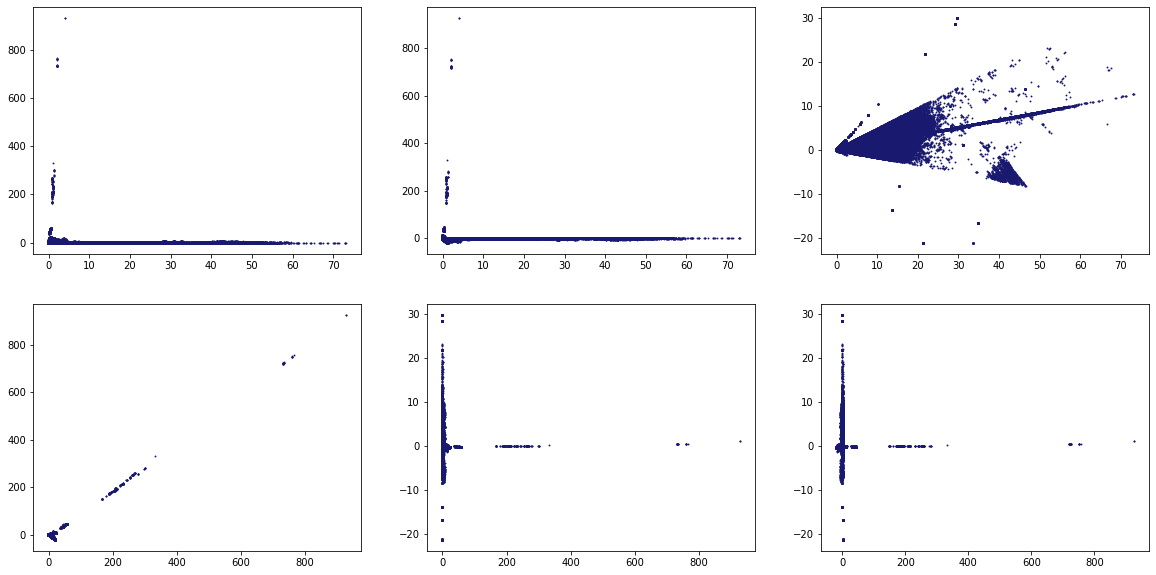

RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009371, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (48004544, 4) && 99.9
variance ratio: [0.39687288 0.25021091 0.24969471 0.10322151]


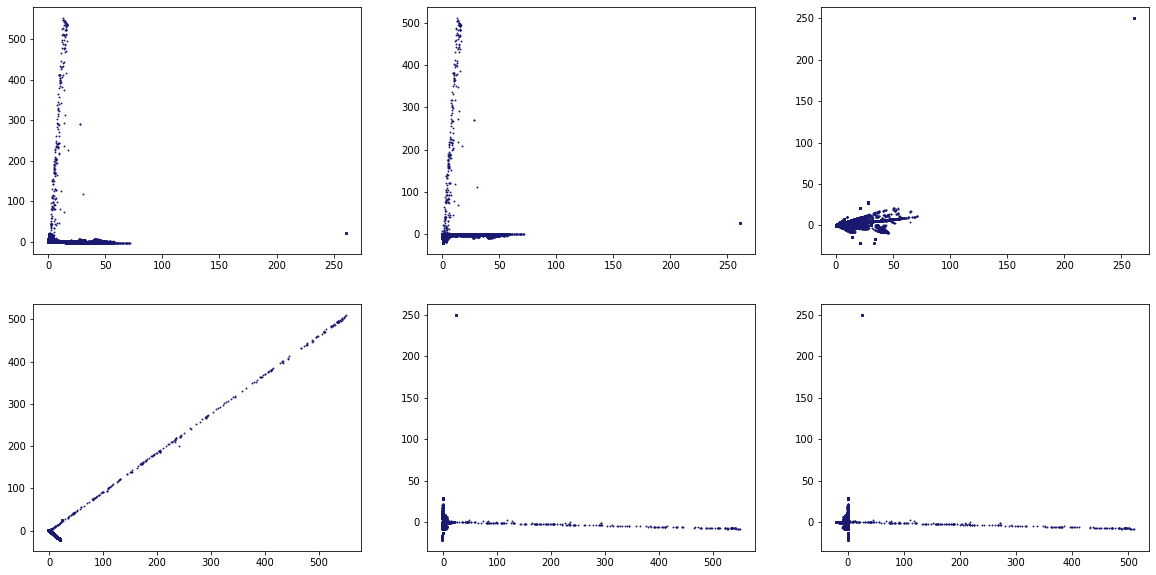

2° time ------------- shape: (48051225, 4) ----------------- 
RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47944747, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47900955, 4) && 99.69
variance ratio: [0.43557561 0.31798232 0.1820334  0.06440866]


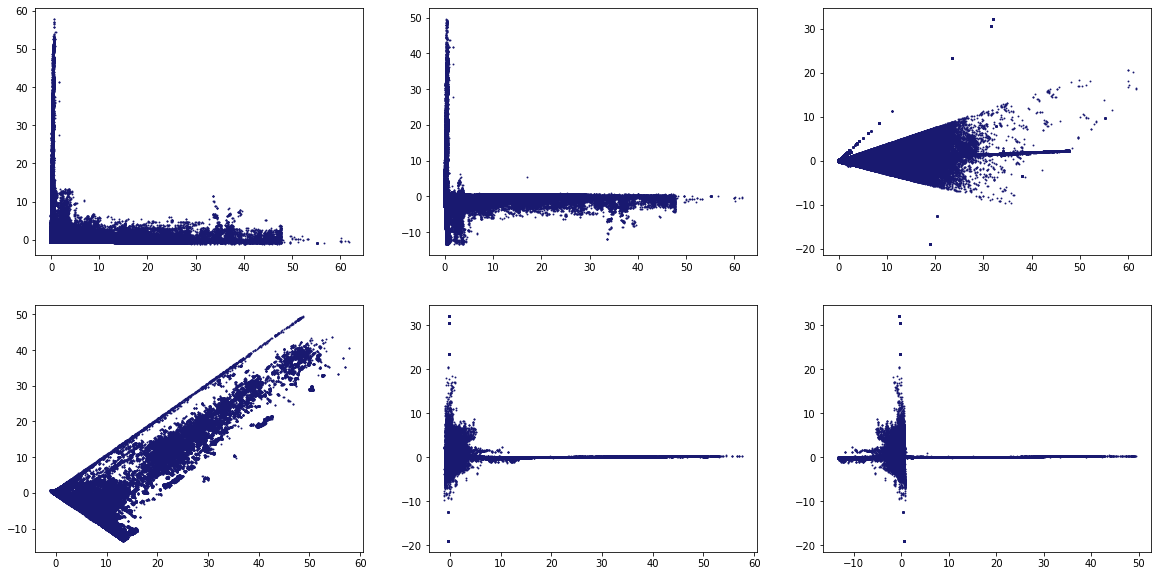

RRKLD_limit=200000000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47944747, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47937759, 4) && 99.76
variance ratio: [0.43556255 0.26097027 0.23905623 0.06441096]


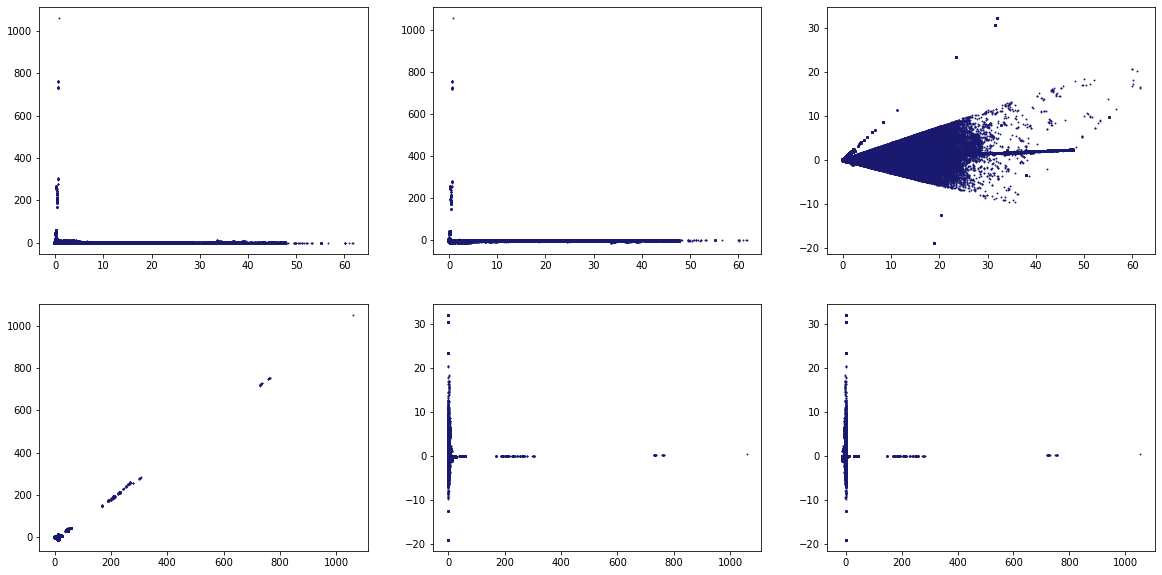

RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47944747, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47940150, 4) && 99.77
variance ratio: [0.42654376 0.25032757 0.2496573  0.07347137]


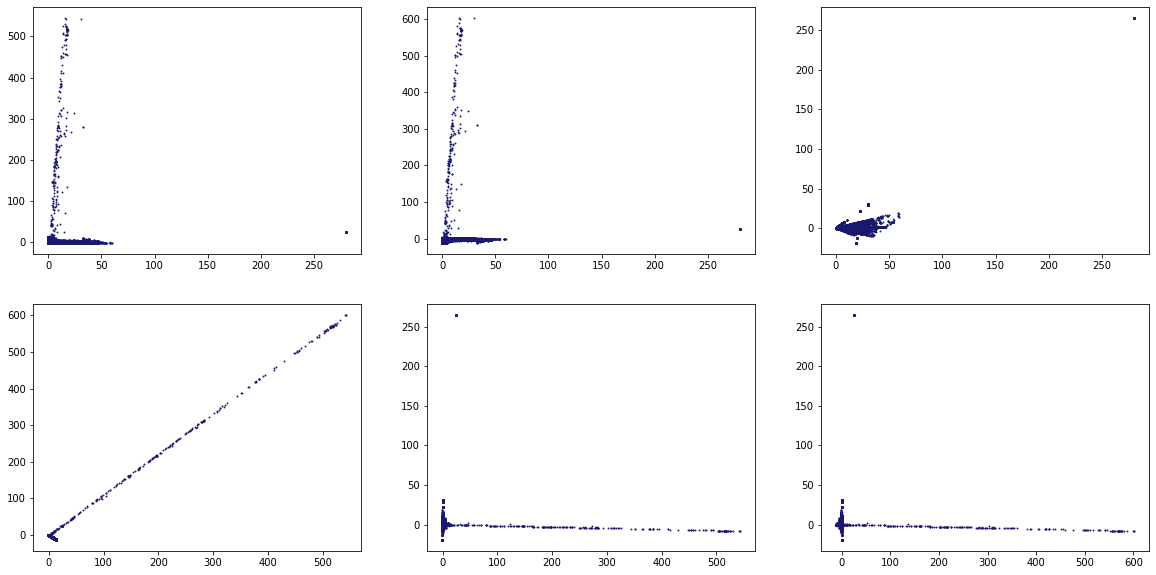

RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009962, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47963534, 4) && 99.82
variance ratio: [0.40272673 0.33620651 0.16361837 0.0974484 ]


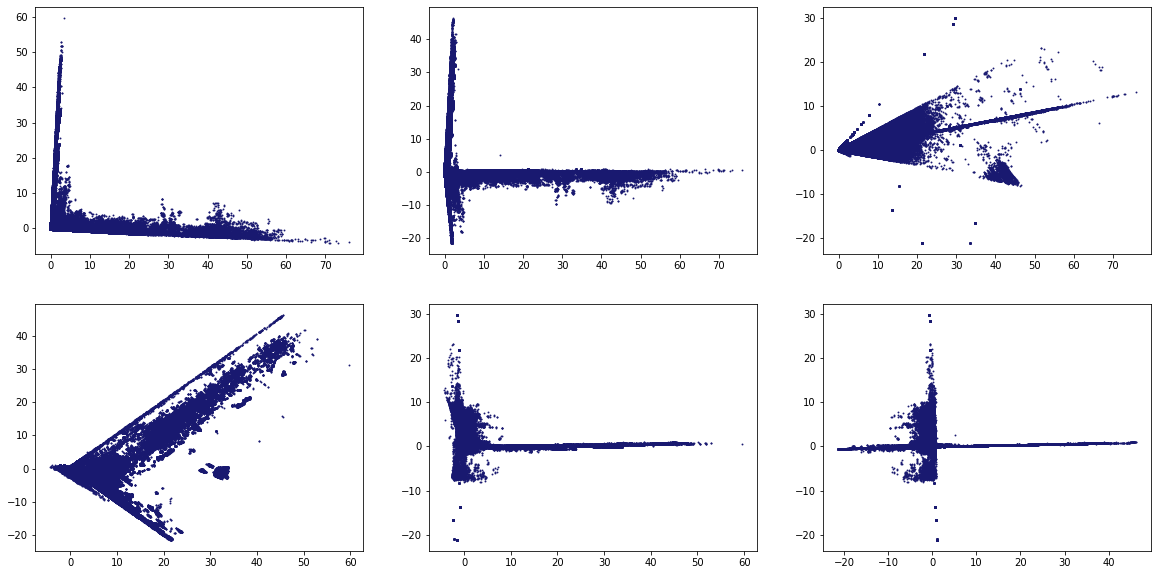

RRKLD_limit=200000000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009962, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (48002761, 4) && 99.9
variance ratio: [0.40259768 0.25923627 0.2406999  0.09746615]


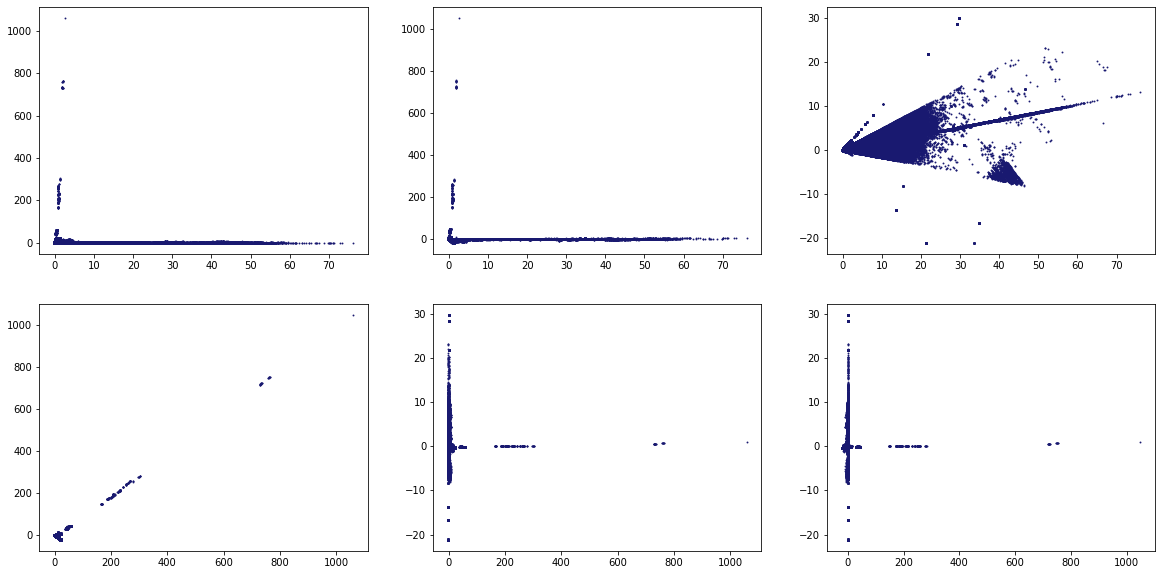

RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009962, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (48005153, 4) && 99.9
variance ratio: [0.39613388 0.25020303 0.24970002 0.10396306]


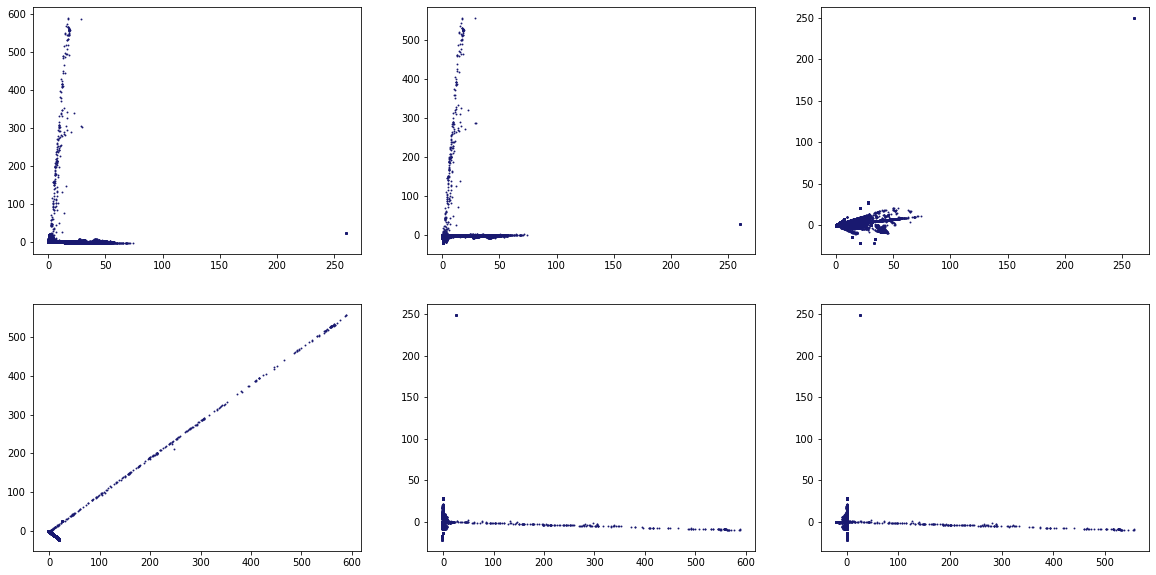

3° time ------------- shape: (48051225, 4) ----------------- 
RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47944302, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47900630, 4) && 99.69
variance ratio: [0.43536029 0.31815058 0.18186899 0.06462015]


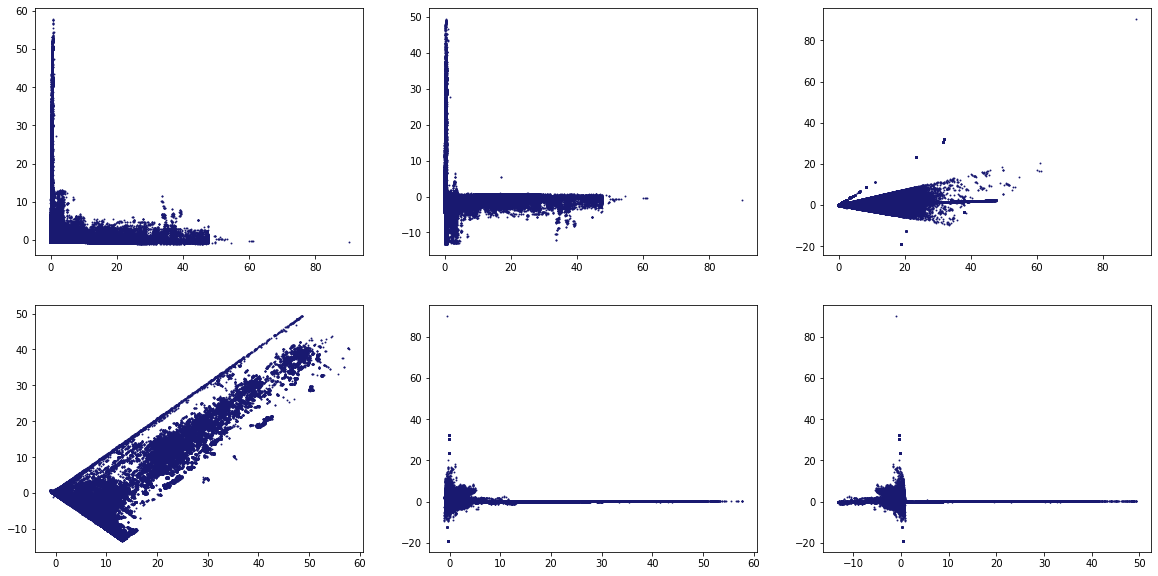

RRKLD_limit=200000000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47944302, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47937342, 4) && 99.76
variance ratio: [0.43534797 0.26022387 0.23980565 0.06462252]


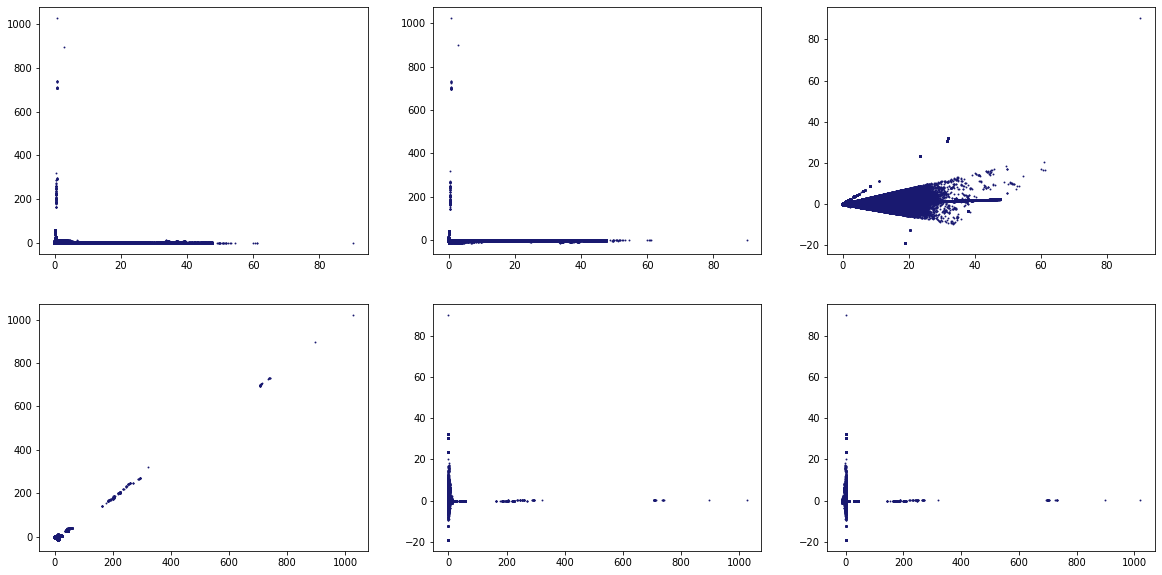

RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47944302, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47939729, 4) && 99.77
variance ratio: [0.42733387 0.25036712 0.24962702 0.07267199]


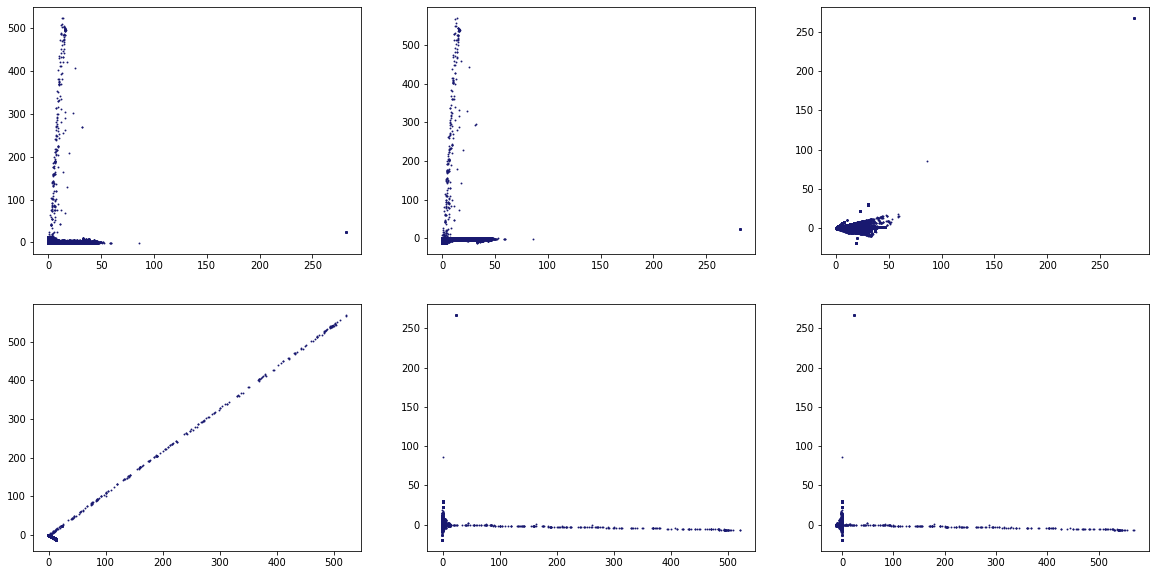

RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009460, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47963517, 4) && 99.82
variance ratio: [0.40314306 0.33576772 0.16406397 0.09702525]


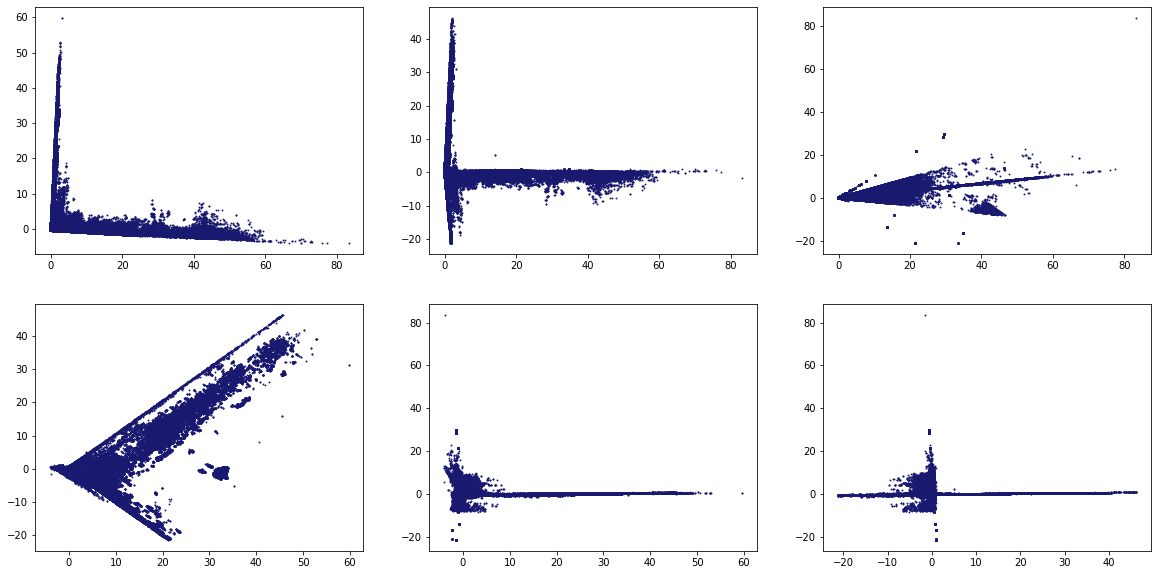

RRKLD_limit=200000000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009460, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (48002264, 4) && 99.9
variance ratio: [0.4030198  0.25868536 0.24125219 0.09704265]


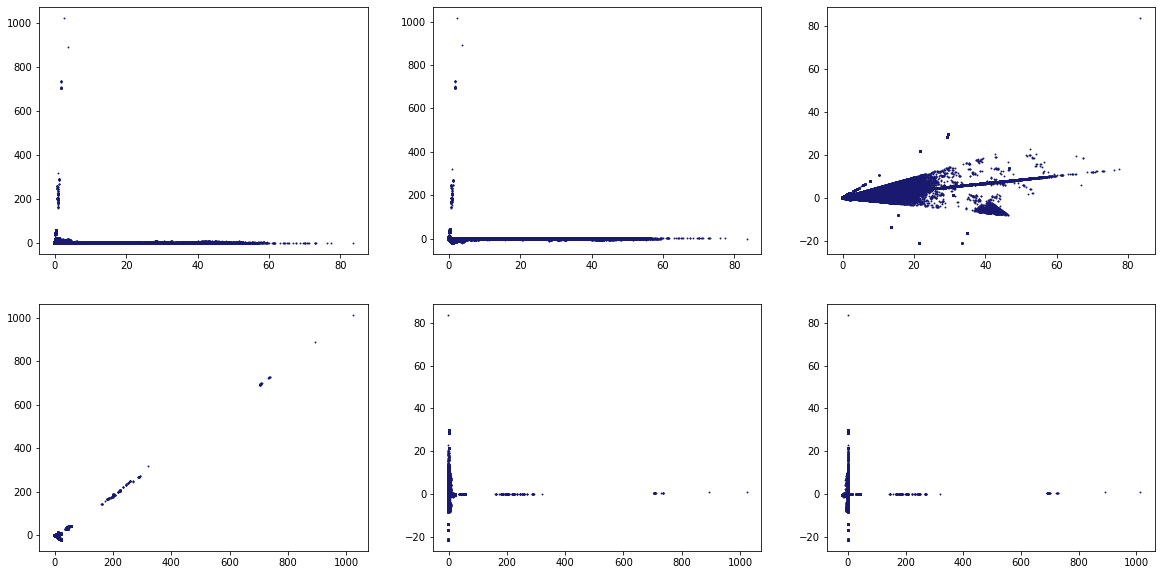

RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009460, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (48004654, 4) && 99.9
variance ratio: [0.39728178 0.25029292 0.24961657 0.10280872]


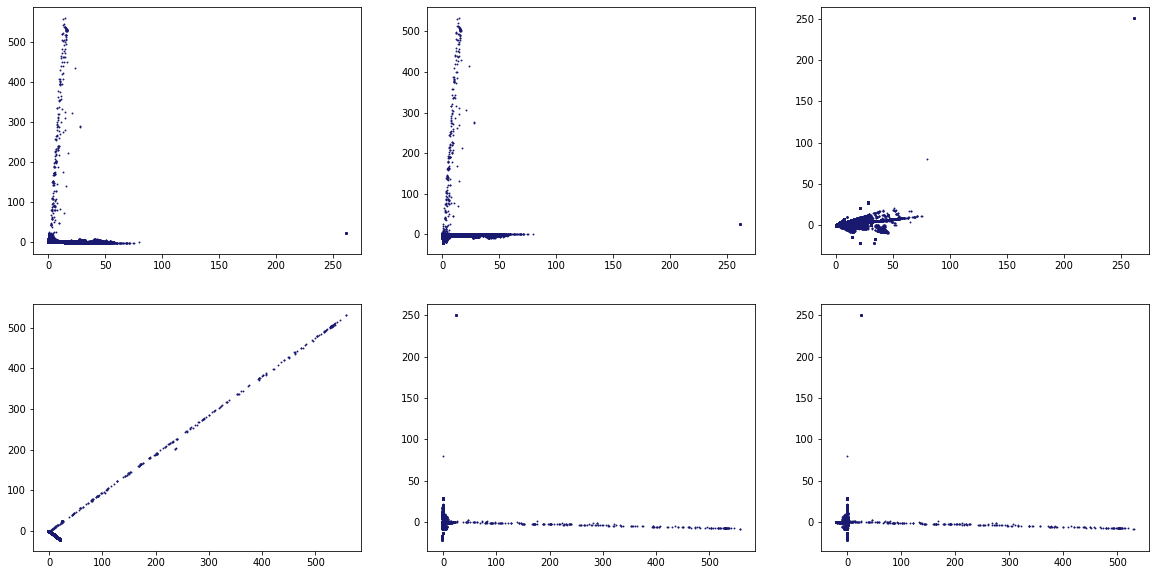

4° time ------------- shape: (48051225, 4) ----------------- 
RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47943459, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47899531, 4) && 99.68
variance ratio: [0.43436222 0.31814572 0.18187708 0.06561498]


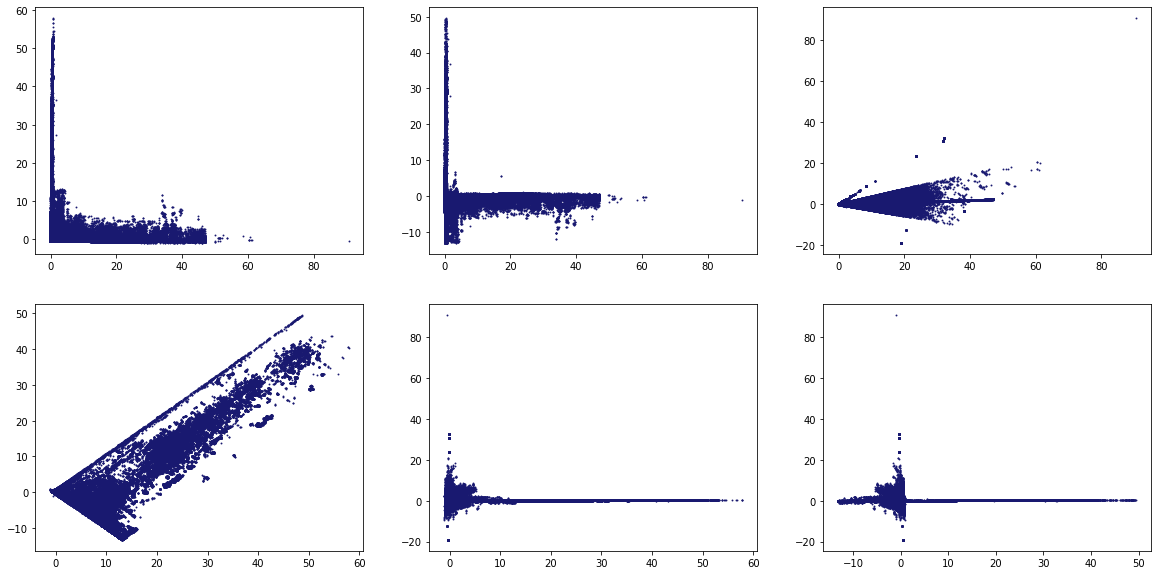

RRKLD_limit=200000000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47943459, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47936367, 4) && 99.76
variance ratio: [0.43435057 0.26033512 0.23969705 0.06561726]


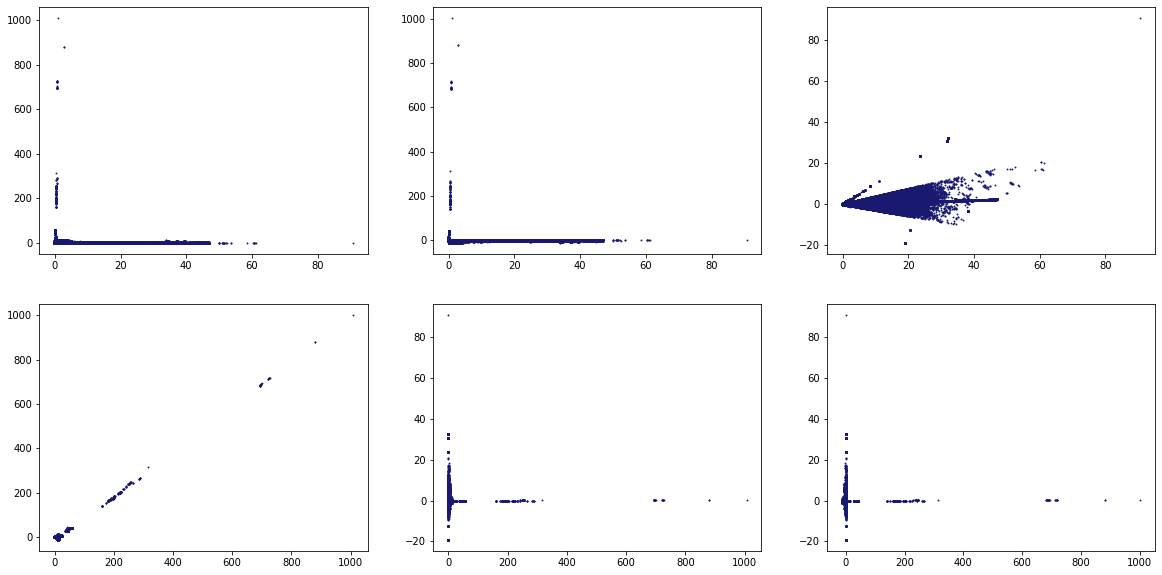

RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=10
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (47943459, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47938829, 4) && 99.77
variance ratio: [0.42785805 0.25032774 0.24968016 0.07213405]


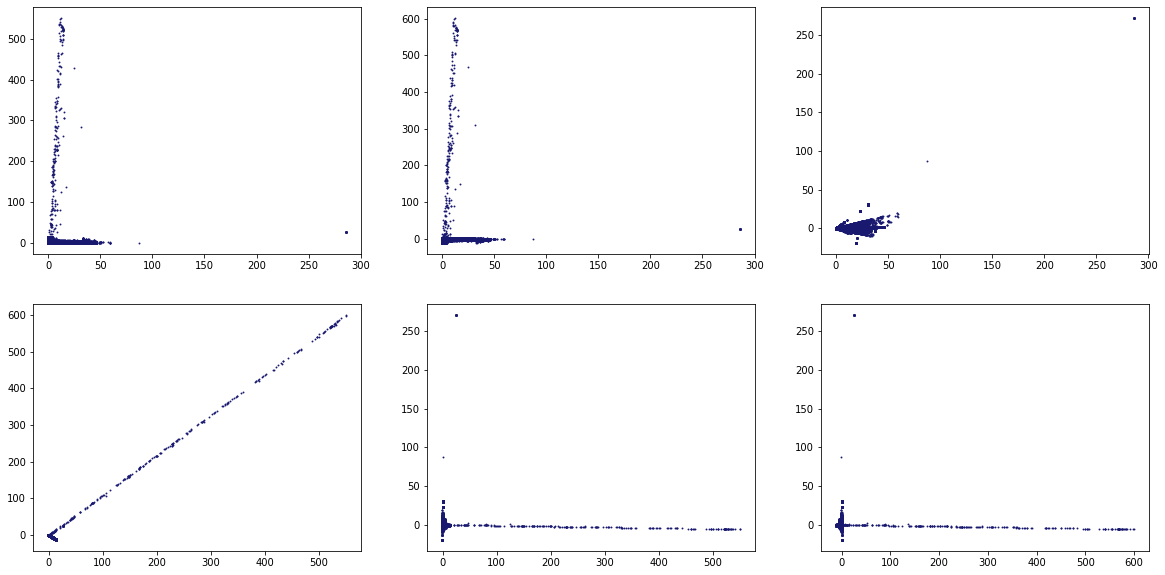

RRKLD_limit=20000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009629, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (47963459, 4) && 99.82
variance ratio: [0.40302366 0.33604857 0.16377098 0.09715679]


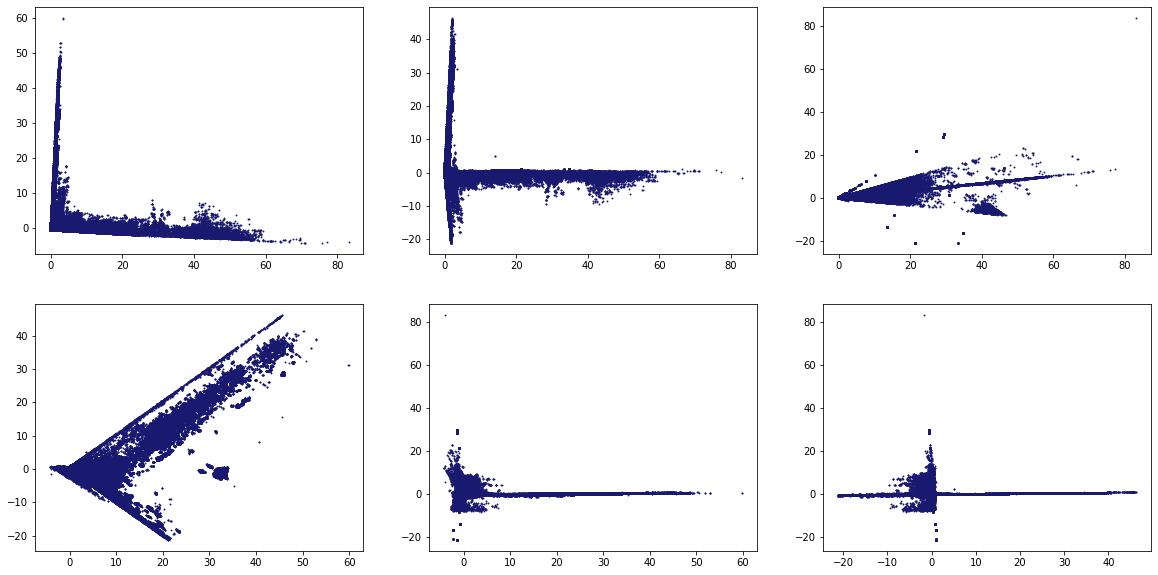

RRKLD_limit=200000000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009629, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (48002323, 4) && 99.9
variance ratio: [0.40289412 0.25870506 0.24122604 0.09717478]


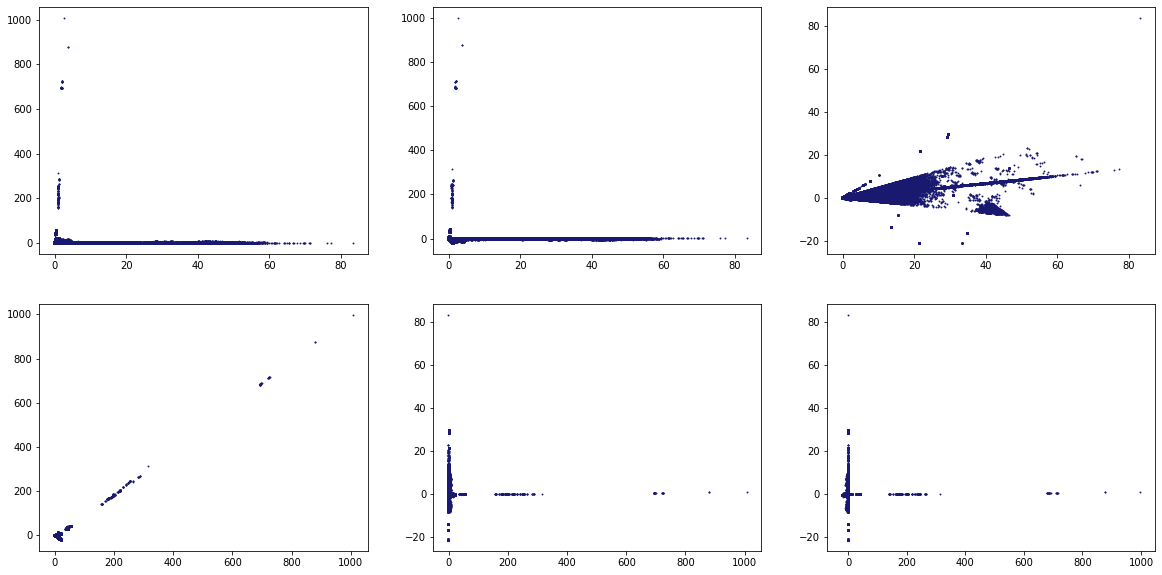

RRKLD_limit=2000000000000, UFAMP_limit=1000000.0, threshold=20
after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (48009629, 4) && 99.91
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (48004785, 4) && 99.9
variance ratio: [0.3982983  0.25017878 0.24973401 0.10178892]


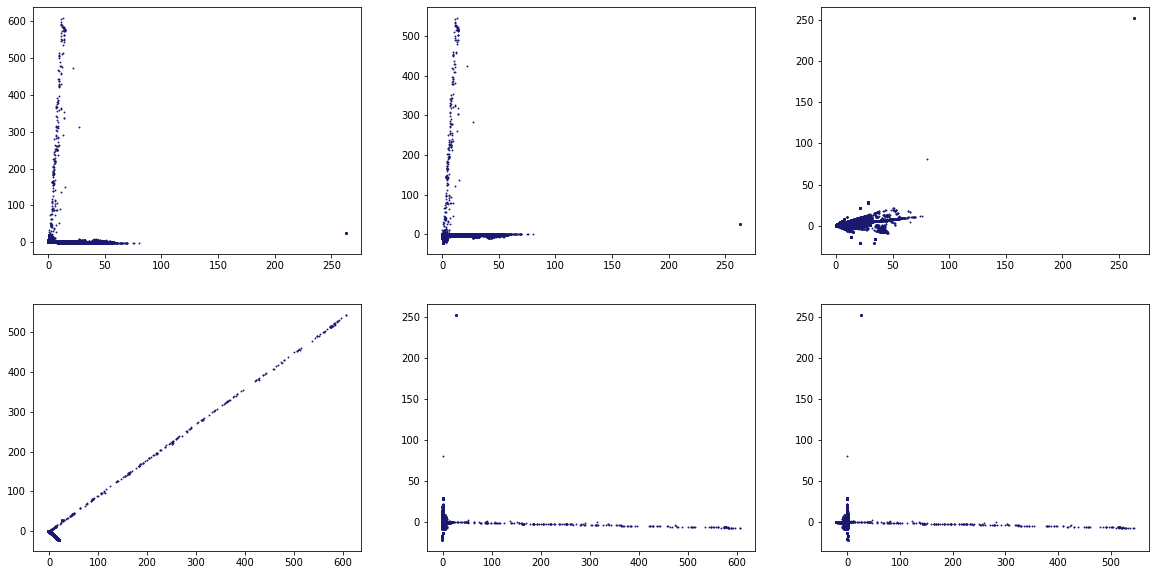

In [7]:
for i in range(4):
    df_DIV = hp.getRandomRows(df_ALL, 0.4)
    print(f'{ i+1 }° time ------------- shape: { df_DIV.shape } ----------------- ')
    df_DIV = cl.cleanData(df_DIV, 'mean')
    UFAMP_limit = 1e+6
    for t in range(2):
        threshold = 10 * (t + 1)
        for j in range(3):
            RRKLD_limit = pow(10, 4*(j+1)) * 2
            print(f'RRKLD_limit={RRKLD_limit}, UFAMP_limit={UFAMP_limit}, threshold={threshold}')
            df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCA(df_DIV, threshold, UFAMP_limit, RRKLD_limit)
            del df_nout, Xnorm, Xpca, ; gc.collect()
            dp.printPCAScatter(dfPca, titPca)
            del dfPca, titPca; gc.collect()
    del df_DIV; gc.collect()

In [6]:
df_ALL.describe()

vectorRRKLD_ALL  vectorFAmpKLD_ALL  vectorUFAmpKLD_ALL  \
count     4.805014e+07       4.805122e+07        4.805122e+07   
mean      1.531102e+14       1.728071e+02        4.115108e+14   
std                inf       3.070341e+03                 inf   
min      -1.237399e+01       0.000000e+00       -6.423305e+00   
25%       8.480914e+00       3.862083e+00        1.081343e+01   
50%       1.087142e+01       5.341107e+00        1.412200e+01   
75%       1.527263e+01       7.922927e+00        2.049551e+01   
max       3.318696e+19       8.780618e+05        2.250281e+20   

       vectorCorrKLD_ALL  
count       4.735358e+07  
mean        1.120447e+01  
std         2.930374e+01  
min         0.000000e+00  
25%         4.912024e+00  
50%         7.187421e+00  
75%         1.100903e+01  
max         1.964942e+04

>200 - 921773/50358400 = 1.83% null values (for most unfavorable feature vectorCorrKLD_ALL)

>300 - 1377982/81318210 = 1.7% null values (for most unfavorable feature vectorCorrKLD_ALL)

In [7]:
len(df_ALL) - df_ALL.count()

vectorRRKLD_ALL         1081
vectorFAmpKLD_ALL          9
vectorUFAmpKLD_ALL         9
vectorCorrKLD_ALL     697645
dtype: int64

In [8]:
X_ALL = df_ALL.to_numpy()

In [9]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_ALL)
X_ALL = imp_mean.transform(X_ALL)

In [10]:
df_ALL = hp.convertDictInDF(hp.putDataInDict(
        [X_ALL[:,0], X_ALL[:,1], X_ALL[:,2], X_ALL[:,3]],
        ['vectorRRKLD', 'vectorFAmpKLD', 'vectorUFAmpKLD', 'vectorCorrKLD']
    ))
del X_ALL; gc.collect();

In [11]:
df_ALL.describe()

vectorRRKLD  vectorFAmpKLD  vectorUFAmpKLD  vectorCorrKLD
count  4.805122e+07   4.805122e+07    4.805122e+07   4.805122e+07
mean   1.531100e+14   1.728071e+02    4.115108e+14   1.120445e+01
std             inf   3.070340e+03             inf   2.909023e+01
min   -1.237399e+01   0.000000e+00   -6.423305e+00   0.000000e+00
25%    8.480971e+00   3.862083e+00    1.081343e+01   4.946457e+00
50%    1.087154e+01   5.341108e+00    1.412200e+01   7.263485e+00
75%    1.527305e+01   7.922931e+00    2.049552e+01   1.120447e+01
max    3.318696e+19   8.780618e+05    2.250281e+20   1.964942e+04

> From description, we can see that "vectorRRKLD" and "vectorUFAmpKLD" have a strange behavior (inf std dev??)

In [11]:
importlib.reload(cl)

<module 'clustering' from '/homes/v18porti/Documents/code/imt_stg/clustering.py'>

> ```python 
df_nout = cl.removeOutliers(df_ALL, threshold = 20, UFAMP_limit = 1e+6, RRKLD_limit = 2e+16)
# PCA = [0.39533904 0.25020213 0.2497023  0.10475654]
```

after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (71916427, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (71911927, 4) && 99.77
variance ratio: [0.42768334 0.2503115  0.24967917 0.07232598]


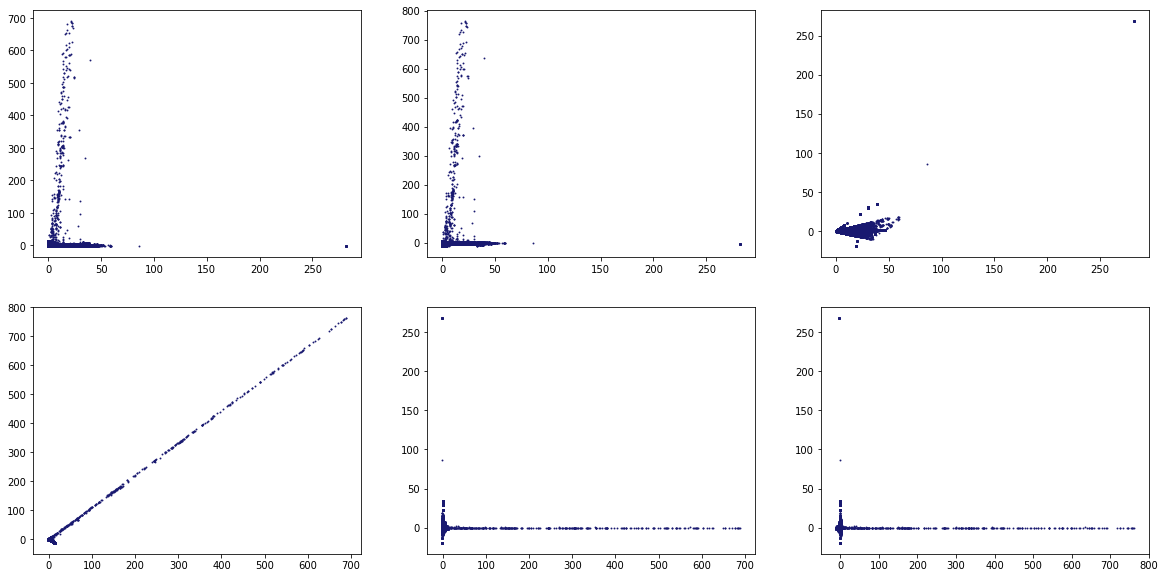

10863

In [12]:
df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCA(df_ALL, threshold = 10, UFAMP_limit = 1e+6, RRKLD_limit = 2e+16)
dp.printPCAScatter(dfPca, titPca)
del df_nout, Xnorm, Xpca, dfPca, titPca; gc.collect()

> ```python 
df_nout = cl.removeOutliers(df_ALL, threshold = 20, UFAMP_limit = 1e+6, RRKLD_limit = 2e+10)
# PCA = [0.40256682 0.25236562 0.24756938 0.09749818]
```

after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (71916427, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (71909052, 4) && 99.77
variance ratio: [0.43521928 0.25419539 0.2458328  0.06475254]


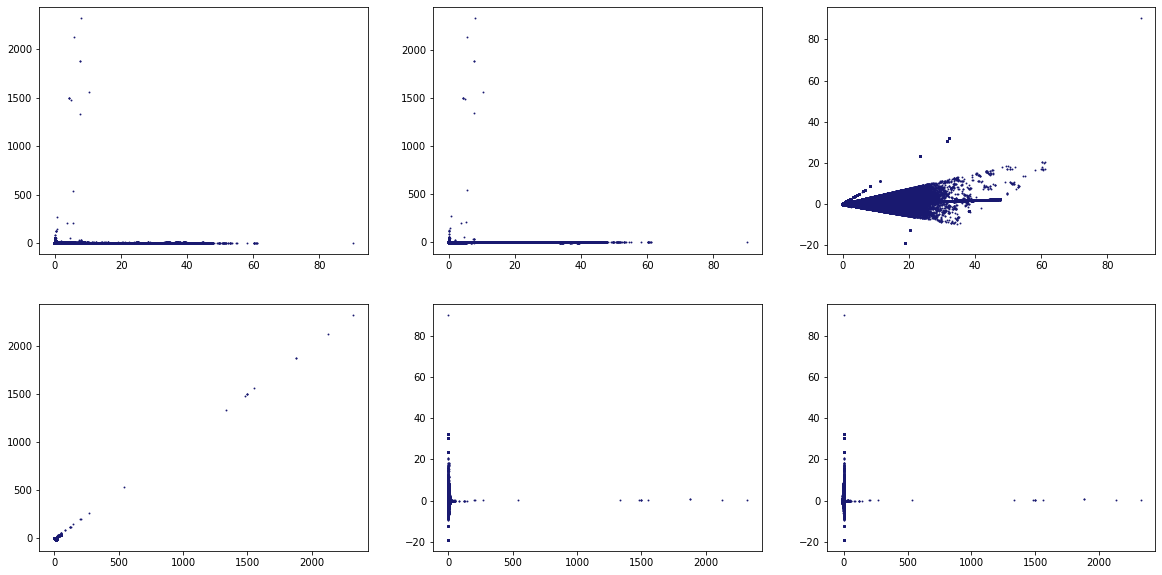

10503

In [13]:
df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCA(df_ALL, threshold = 10, UFAMP_limit = 1e+6, RRKLD_limit = 2e+10)
dp.printPCAScatter(dfPca, titPca)
del df_nout, Xnorm, Xpca, dfPca, titPca; gc.collect()

> ```python 
df_nout = cl.removeOutliers(df_ALL, threshold = 20, UFAMP_limit = 1e+6, RRKLD_limit = 2e+6)
# PCA = [0.40257751 0.29276652 0.20715906 0.09749691]
```

after soft removal (vectorCorrKLD && vectorFAmpKLD) shape : (71916427, 4) && 99.78
after hard removal (vectorUFAmpKLD && vectorRRKLD) shape : (71903424, 4) && 99.76
variance ratio: [0.43521992 0.2973246  0.20270309 0.06475238]


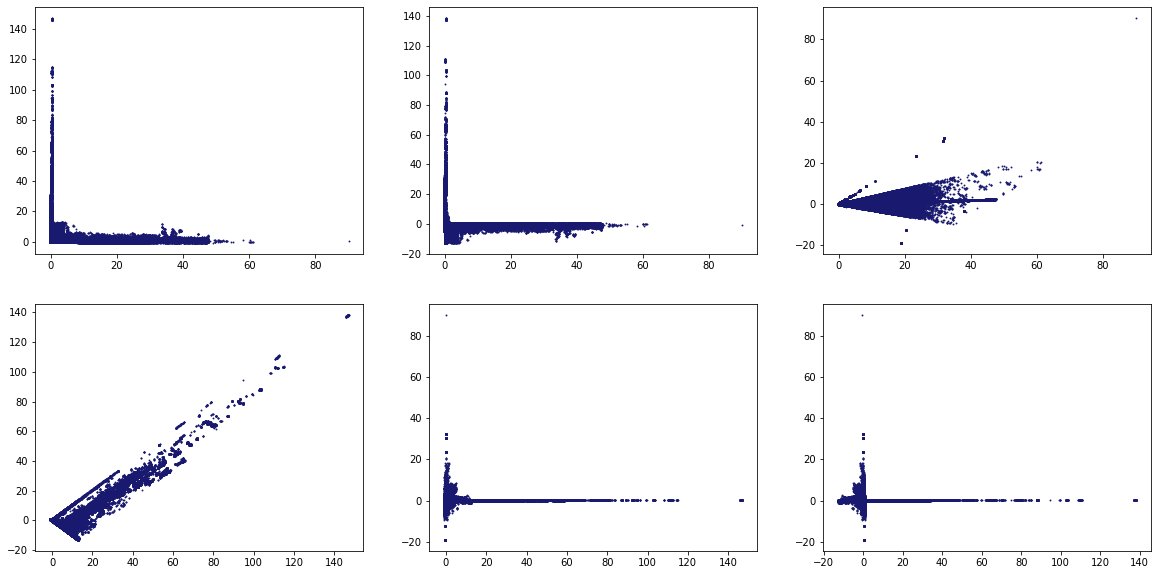

10803

In [14]:
df_nout, Xnorm, Xpca, dfPca, titPca = cl.runOutNormPCA(df_ALL, threshold = 10, UFAMP_limit = 1e+6, RRKLD_limit = 2e+6)
dp.printPCAScatter(dfPca, titPca)
del df_nout, Xnorm, Xpca, dfPca, titPca; gc.collect()

------ jueves hasta aqui

In [50]:
del dfPca; gc.collect()

8111

# HEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE

> ```python 
df_nout = cl.removeOutliers(df_ALL, threshold = 20, UFAMP_limit = 1e+6, RRKLD_limit = 2e+16)
# PCA = [0.39533904 0.25020213 0.2497023  0.10475654]
```

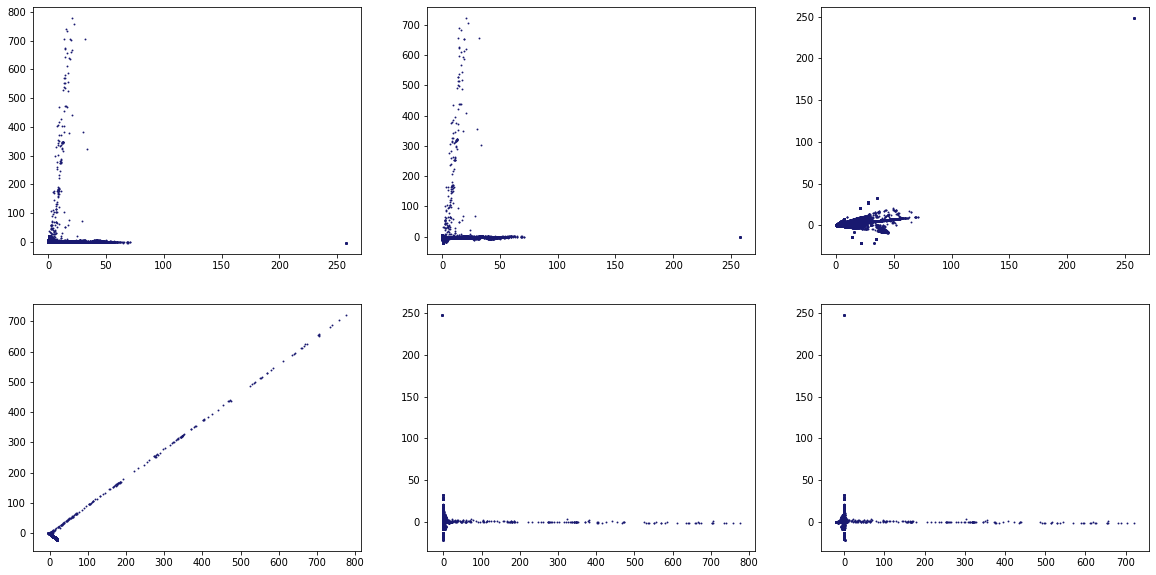

In [62]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0, 0].scatter(dfPca['pc1'], dfPca['pc2'],  s=0.8, c='midnightblue')
ax[0, 1].scatter(dfPca['pc1'], dfPca['pc3'],  s=0.8, c='midnightblue')
ax[0, 2].scatter(dfPca['pc1'], dfPca['pc4'],  s=0.8, c='midnightblue')
ax[1, 0].scatter(dfPca['pc2'], dfPca['pc3'],  s=0.8, c='midnightblue')
ax[1, 1].scatter(dfPca['pc2'], dfPca['pc4'],  s=0.8, c='midnightblue')
ax[1, 2].scatter(dfPca['pc3'], dfPca['pc4'],  s=0.8, c='midnightblue')
plt.show(); fig.clf(); plt.close();

> ```python 
df_nout = cl.removeOutliers(df_ALL, threshold = 20, UFAMP_limit = 1e+6, RRKLD_limit = 2e+10)
# PCA = [0.40256682 0.25236562 0.24756938 0.09749818]
```

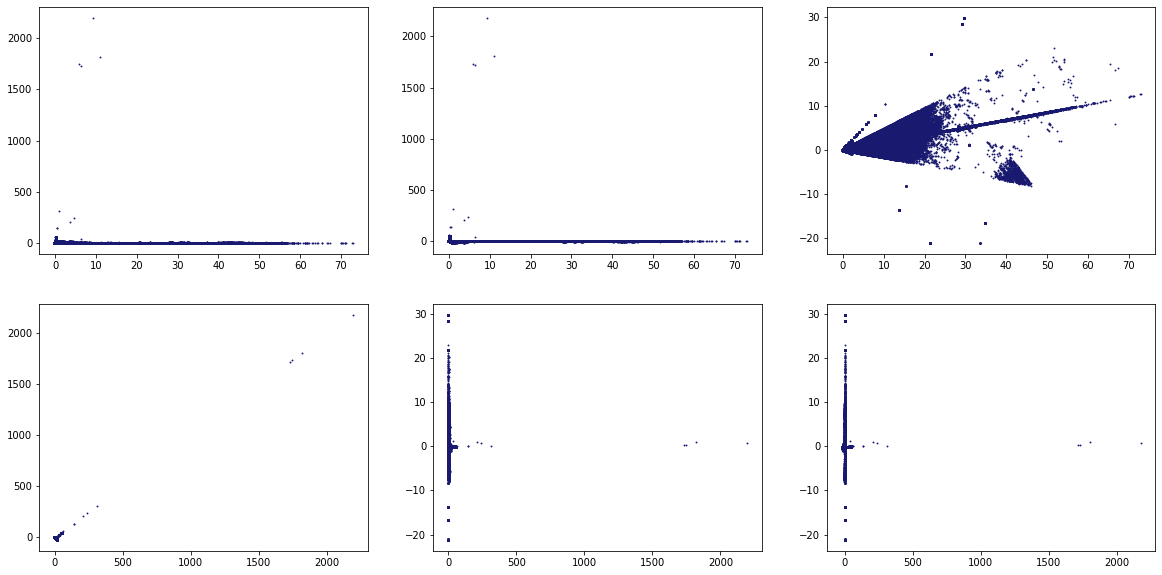

In [57]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0, 0].scatter(dfPca['pc1'], dfPca['pc2'],  s=0.8, c='midnightblue')
ax[0, 1].scatter(dfPca['pc1'], dfPca['pc3'],  s=0.8, c='midnightblue')
ax[0, 2].scatter(dfPca['pc1'], dfPca['pc4'],  s=0.8, c='midnightblue')
ax[1, 0].scatter(dfPca['pc2'], dfPca['pc3'],  s=0.8, c='midnightblue')
ax[1, 1].scatter(dfPca['pc2'], dfPca['pc4'],  s=0.8, c='midnightblue')
ax[1, 2].scatter(dfPca['pc3'], dfPca['pc4'],  s=0.8, c='midnightblue')
plt.show(); fig.clf(); plt.close();

> ```python 
df_nout = cl.removeOutliers(df_ALL, threshold = 20, UFAMP_limit = 1e+6, RRKLD_limit = 2e+6)
# PCA = [0.40257751 0.29276652 0.20715906 0.09749691]
```

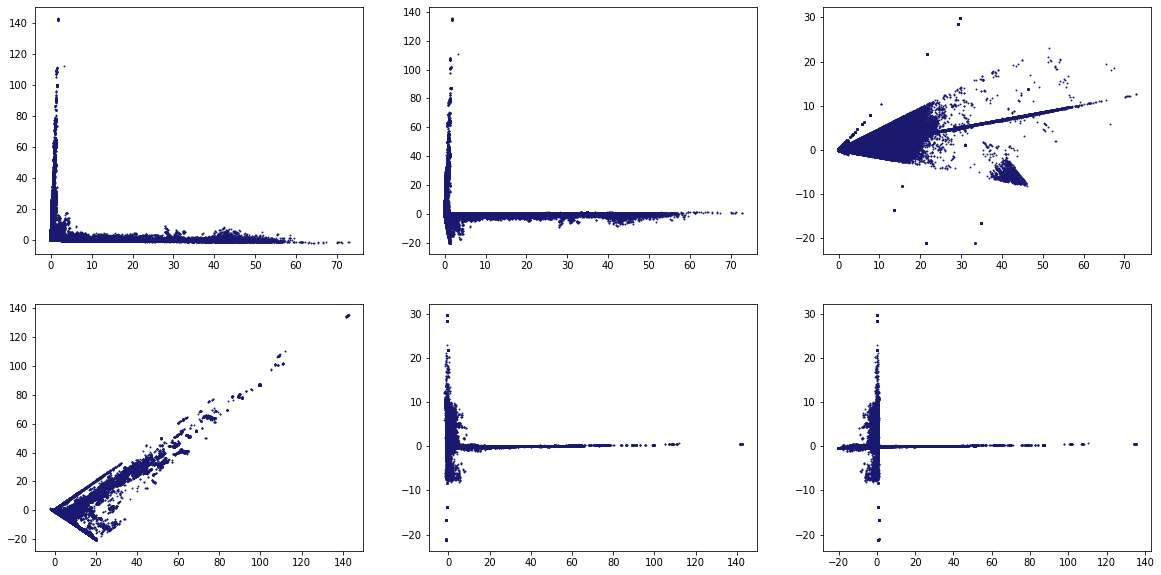

In [68]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
ax[0, 0].scatter(dfPca['pc1'], dfPca['pc2'],  s=0.8, c='midnightblue')
ax[0, 1].scatter(dfPca['pc1'], dfPca['pc3'],  s=0.8, c='midnightblue')
ax[0, 2].scatter(dfPca['pc1'], dfPca['pc4'],  s=0.8, c='midnightblue')
ax[1, 0].scatter(dfPca['pc2'], dfPca['pc3'],  s=0.8, c='midnightblue')
ax[1, 1].scatter(dfPca['pc2'], dfPca['pc4'],  s=0.8, c='midnightblue')
ax[1, 2].scatter(dfPca['pc3'], dfPca['pc4'],  s=0.8, c='midnightblue')
plt.show(); fig.clf(); plt.close();

In [50]:
del dfPca; gc.collect()

8111

# Models

### Gaussian

In [51]:
gmm = GaussianMixture(n_components=6, covariance_type='full')
gmm.fit(Xpca)

KeyboardInterrupt: 

### ------------------------------ START --------------------------------------

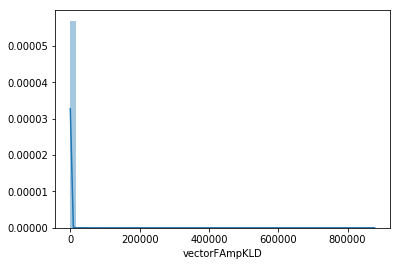

In [10]:
sns.distplot(df_ALL['vectorFAmpKLD']) # 200

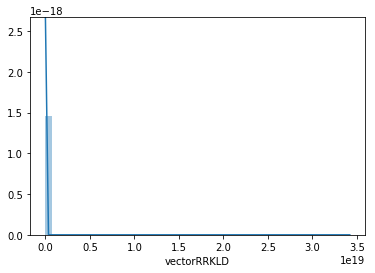

In [11]:
sns.distplot(df_ALL['vectorRRKLD']) # 200

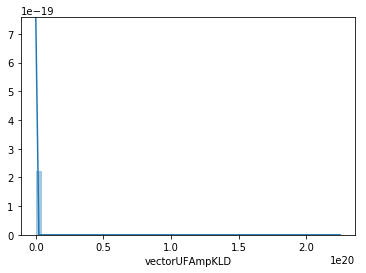

In [12]:
sns.distplot(df_ALL['vectorUFAmpKLD']) # 200

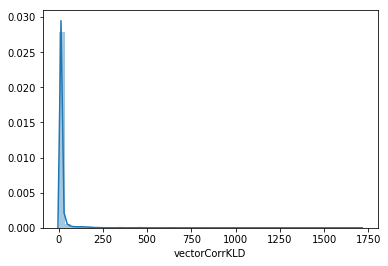

In [ ]:
sns.distplot(df_ALL['vectorCorrKLD']) # 200

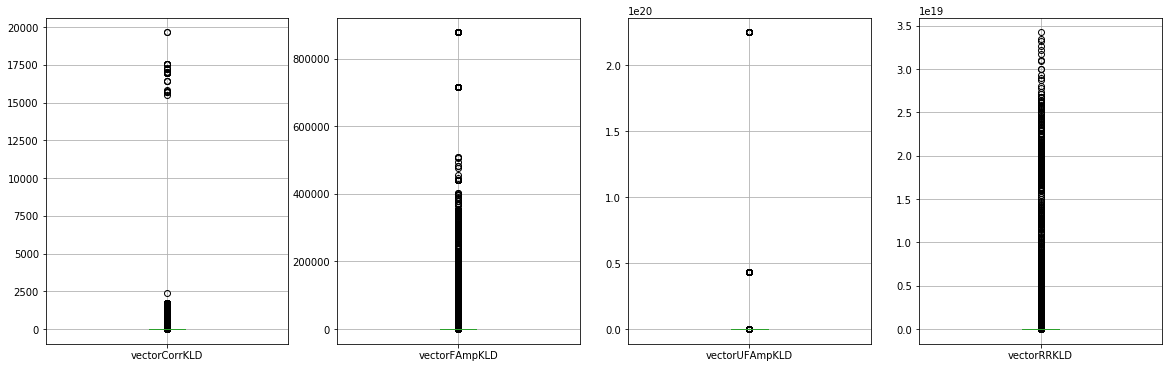

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6)) # 300
df_ALL.boxplot(column='vectorCorrKLD', ax=ax[0])
df_ALL.boxplot(column='vectorFAmpKLD', ax=ax[1])
df_ALL.boxplot(column='vectorUFAmpKLD', ax=ax[2])
df_ALL.boxplot(column='vectorRRKLD', ax=ax[3])
plt.show()
fig.clf()
plt.close()

# Take out outliers 

## Zscore 

> Tried other statistical methods (listed below) but got not conclusive results (the ouliers I wanted to be removed weren't) and the complexity was too high for KNN and LocalOutlierFactor so time and memory were an issue, for HBOS, acting in an unique column threw no results at all and with all columns, not desired results. Also, LocalOutlierFactor removed completely 2 features, highly due to the issue with calculations, once deleted the extreme outliers, it worked differently.
```python
from sklearn.neighbors import LocalOutlierFactor
from pyod.models.hbos import HBOS # Histogram-based Outlier Detection
from pyod.models.knn import KNN # K Nearest Neighbors
```


In [7]:
df_1 = df_ALL

In [11]:
threshold = 10

In [12]:
print(np.abs(st.zscore(df_1['vectorRRKLD'])))
print(np.abs(st.zscore(df_1['vectorFAmpKLD'])))
print(np.abs(st.zscore(df_1['vectorUFAmpKLD'])))
print(np.abs(st.zscore(df_1['vectorCorrKLD'])))

/homes/v18porti/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/homes/v18porti/.local/lib/python3.6/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


[0. 0. 0. ... 0. 0. 0.]
[0.03516507 0.03523961 0.03523359 ... 0.03529376 0.03529376 0.03539162]
[0. 0. 0. ... 0. 0. 0.]
[0.34297556 0.34216455 0.34216455 ... 0.29440117 0.29440117 0.32050768]


## HARD REMOVE 
(Columns showing resistence to statistical removal: vectorUFAmpKLD, vectorRRKLD)

> Used 2e+2 as manual limit for both vectorUFAmpKLD and 0.5e+2 vectorRRKLD

>Just deleted this way maximum 95% of the data (for 200 patients && 300)

### vectorUFAmpKLD

In [17]:
df_2 = df_1.copy()
df_2 = df_1[(df_1['vectorUFAmpKLD'] < 2e+2)]
print(df_1.shape)
print(df_2.shape)
print(100*df_2.shape[0]/df_1.shape[0])

(81320065, 4)
(77762533, 4)
95.62527157350404


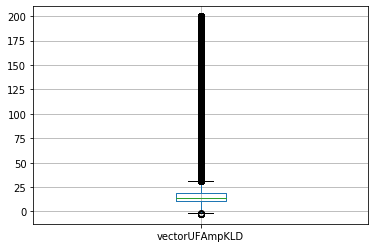

In [18]:
df_2.boxplot('vectorUFAmpKLD') # 300

> Now, the distribution is more obvious

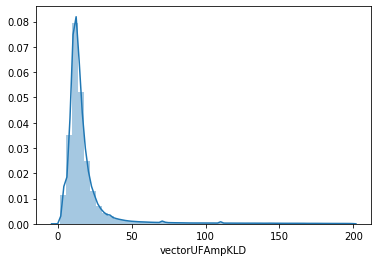

In [20]:
sns.distplot(df_2['vectorUFAmpKLD']) # 300

> just after removal, zscore is now available

In [19]:
np.abs(st.zscore(df_2['vectorUFAmpKLD']))
print(max(np.abs(st.zscore(df_2['vectorUFAmpKLD']))))

8.202746


### vectorRRKLD

In [21]:
df_2 = df_1.copy()
df_2 = df_1[(df_1['vectorRRKLD'] < 0.5e+2)]
print(df_1.shape)
print(df_2.shape)
print(100*df_2.shape[0]/df_1.shape[0])

(81320065, 4)
(79528675, 4)
97.79711194279051


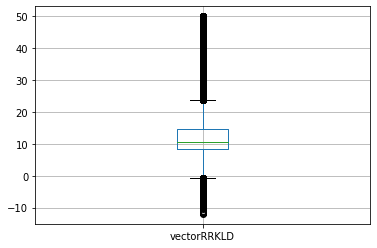

In [22]:
df_2.boxplot('vectorRRKLD') # 300

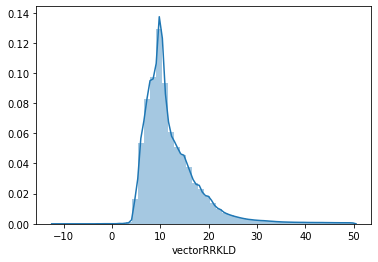

In [24]:
sns.distplot(df_2['vectorRRKLD']) # 300

In [23]:
print(np.abs(st.zscore(df_2['vectorRRKLD'])))
print(max(np.abs(st.zscore(df_2['vectorRRKLD']))))

[0.41320977 0.46862367 0.4463541  ... 0.56082994 0.56082994 0.55804116]
6.1892967


## Soft Remove

### vectorFAmpKLD 
> threshold 100, 50, 10, 2 ≈ 99 %

In [20]:
threshold = 2

In [21]:
df_2 = df_1.copy()
z = np.abs(st.zscore(df_2['vectorFAmpKLD']))
print(max( z ))
print(np.where(z > threshold))

288.5417
(array([  408614,   408615,   408616, ..., 78151875, 78151876, 78151877]),)


In [22]:
df_2 = df_2[(z <= threshold)]
print(df_1.shape)
print(df_2.shape)
print(100*df_2.shape[0]/df_1.shape[0])

(81320065, 4)
(81037471, 4)
99.65249166979883


> BEFORE / AFTER

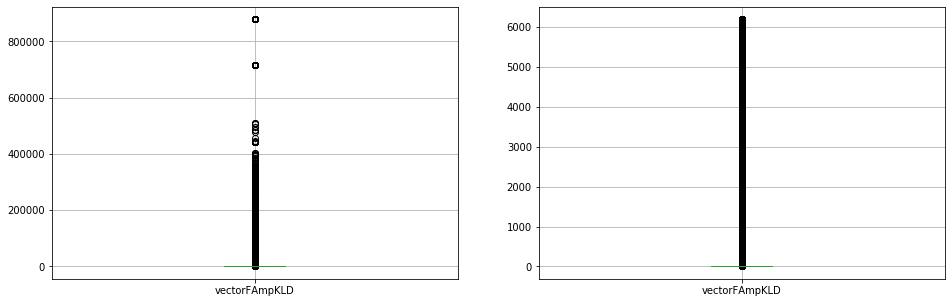

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5)) # 300
df_ALL.boxplot(column='vectorFAmpKLD', ax=ax[0])
df_2.boxplot(column='vectorFAmpKLD', ax=ax[1])
plt.show(); fig.clf(); plt.close()

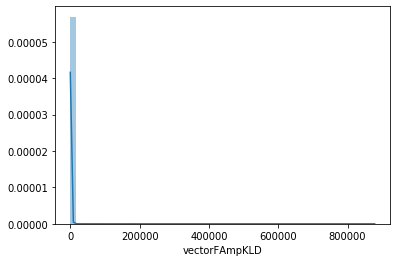

In [45]:
sns.distplot(df_2['vectorFAmpKLD']) # 300

### vectorCorrKLD 
> threshold 100, 50, 10 ≈ 99 %

> threshold 2 ≈ 98 %

In [8]:
threshold = 2

In [9]:
df_2 = df_1.copy()
z = np.abs(st.zscore(df_2['vectorCorrKLD']))
print(max( z ))
print(np.where(z > threshold))

594.34607
(array([  203093,   203094,   203095, ..., 81261863, 81261864, 81261865]),)


In [10]:
df_2 = df_2[(z <= threshold)]
print(df_1.shape)
print(df_2.shape)
print(100*df_2.shape[0]/df_1.shape[0])

(81320065, 4)
(80215488, 4)
98.64169193667024


> BEFORE / AFTER

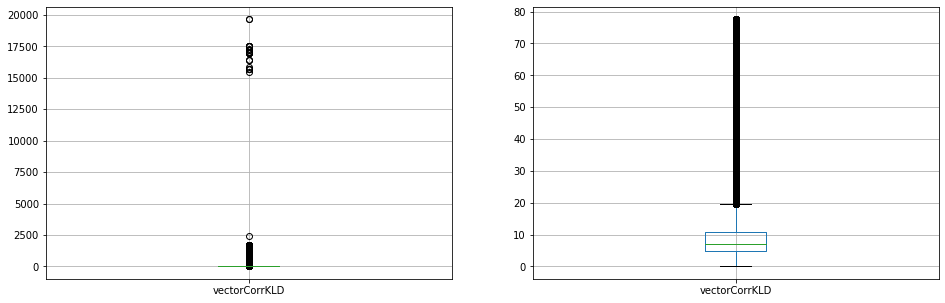

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5)) # 300
df_ALL.boxplot(column='vectorCorrKLD', ax=ax[0])
df_2.boxplot(column='vectorCorrKLD', ax=ax[1])
plt.show(); fig.clf(); plt.close()

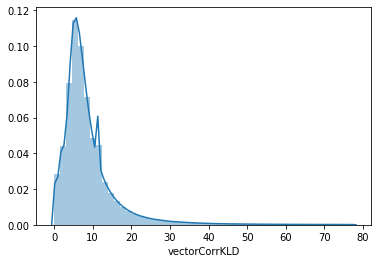

In [12]:
sns.distplot(df_2['vectorCorrKLD']) # 300

## RECAP, Remove outliers

> 1° with the Z Score, 2° the others

In [7]:
df_1 = df_ALL
df_2 = df_1.copy()

In [8]:
zCorrKLD = np.abs(st.zscore(df_1['vectorCorrKLD']))
zFAmpKLD = np.abs(st.zscore(df_1['vectorFAmpKLD']))

In [9]:
threshold = 2
toMaintain_CorrKLD = zCorrKLD <= threshold
toMaintain_FAmpKLD = zFAmpKLD <= threshold
toMaintain = np.logical_and(toMaintain_CorrKLD, toMaintain_FAmpKLD) # boolan array

In [10]:
df_2 = df_2[toMaintain]
print(df_2.shape)

In [12]:
df_3 = df_2.copy()

In [13]:
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 2e+2)]
df_3 = df_3[(df_3['vectorRRKLD'] < 0.5e+2)]
print(df_3.shape)

(75925345, 4)


> get rid of unuserd variables

In [15]:
df_nout = df_3.copy()
del toMaintain_CorrKLD, toMaintain_FAmpKLD, toMaintain, zCorrKLD, zFAmpKLD, df_1, df_2, df_3
gc.collect()

14

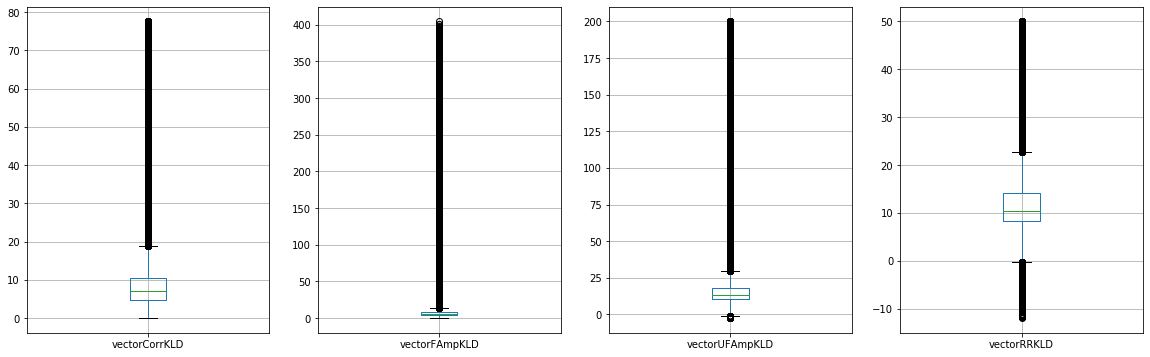

In [16]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))
df_nout.boxplot(column='vectorCorrKLD', ax=ax[0])
df_nout.boxplot(column='vectorFAmpKLD', ax=ax[1])
df_nout.boxplot(column='vectorUFAmpKLD', ax=ax[2])
df_nout.boxplot(column='vectorRRKLD', ax=ax[3])
plt.show(); fig.clf(); plt.close();

> ** Initial proposal **
```python
threshold = 2
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 2e+2)]
df_3 = df_3[(df_3['vectorRRKLD'] < 0.5e+2)]
# PCA = [0.51981844 0.32487906 0.14421139]
```

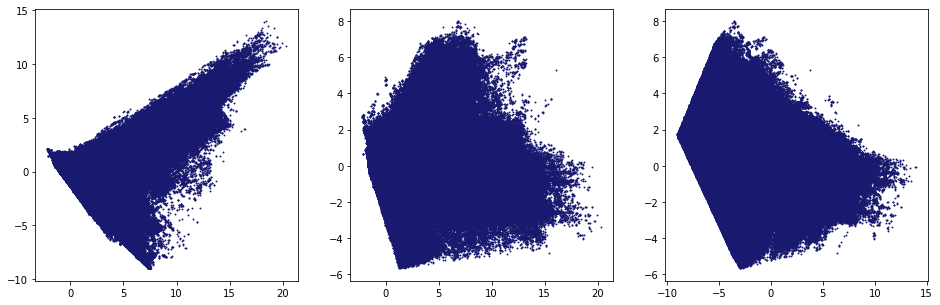

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].scatter(principalDf['pc1'], principalDf['pc2'],  s=0.8, c='midnightblue')
ax[1].scatter(principalDf['pc1'], principalDf['pc3'],  s=0.8, c='midnightblue')
ax[2].scatter(principalDf['pc2'], principalDf['pc3'],  s=0.8, c='midnightblue')
plt.show(); fig.clf(); plt.close();

> Just changing outliers maximum for hard remove
```python
threshold = 2
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 4e+2)]
df_3 = df_3[(df_3['vectorRRKLD'] < 2e+2)]
# PCA = [0.48105975 0.34028187 0.14904106]
```

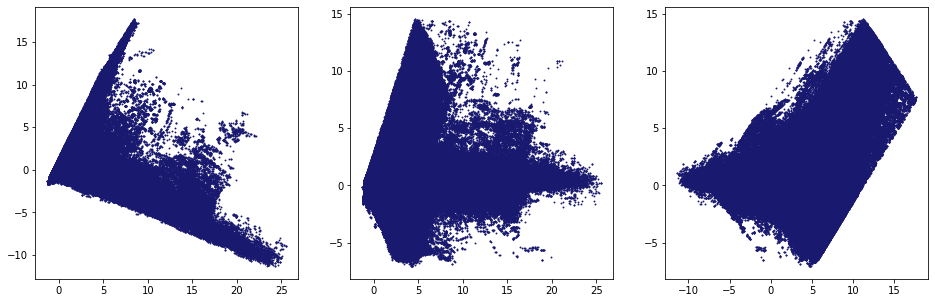

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].scatter(principalDf['pc1'], principalDf['pc2'],  s=0.8, c='midnightblue')
ax[1].scatter(principalDf['pc1'], principalDf['pc3'],  s=0.8, c='midnightblue')
ax[2].scatter(principalDf['pc2'], principalDf['pc3'],  s=0.8, c='midnightblue')
plt.show(); fig.clf(); plt.close();

> Changing both
```python
threshold = 10
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 4e+2)]
df_3 = df_3[(df_3['vectorRRKLD'] < 2e+2)]
# PCA = [0.50520286 0.33244096 0.13633822]
```

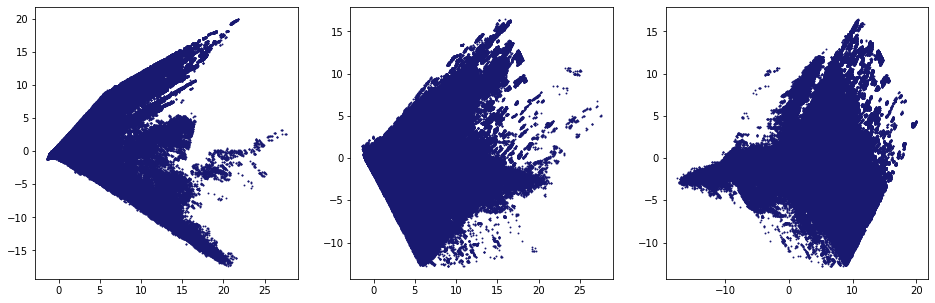

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].scatter(principalDf['pc1'], principalDf['pc2'],  s=0.8, c='midnightblue')
ax[1].scatter(principalDf['pc1'], principalDf['pc3'],  s=0.8, c='midnightblue')
ax[2].scatter(principalDf['pc2'], principalDf['pc3'],  s=0.8, c='midnightblue')
plt.show(); fig.clf(); plt.close();

> Just changing outliers threshold for soft emove
```python
threshold = 50 
threshold = 10
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 2e+2)]
df_3 = df_3[(df_3['vectorRRKLD'] < 0.5e+2)]
# PCA = [0.52816012 0.31097092 0.15069794]
```

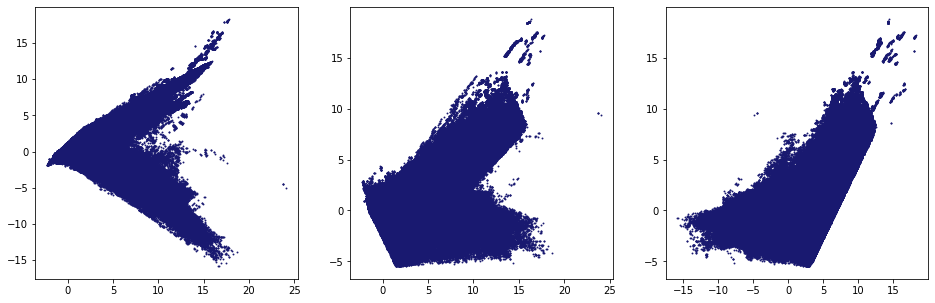

In [23]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].scatter(principalDf['pc1'], principalDf['pc2'],  s=0.8, c='midnightblue')
ax[1].scatter(principalDf['pc1'], principalDf['pc3'],  s=0.8, c='midnightblue')
ax[2].scatter(principalDf['pc2'], principalDf['pc3'],  s=0.8, c='midnightblue')
plt.show(); fig.clf(); plt.close();

> Changing both **IDEAL**, 
```python
threshold = 20
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 1e+6)]
df_3 = df_3[(df_3['vectorRRKLD'] < 2e+17)]
# PCA = [0.45433557 0.25010675 0.24922485]
```

> Changing both, 
```python
threshold = 20
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 1e+6)]
df_3 = df_3[(df_3['vectorRRKLD'] < 2e+20)] # -> No taken out at all
# PCA = [0.60451249 0.33330112 0.06218639]
```

> Changing both, 
```python
threshold = 20
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 1e+6)]
df_3 = df_3[(df_3['vectorRRKLD'] < 2e+15)]
# PCA = [0.45357165 0.25066543 0.24930128]
```

> Changing both, 
```python
threshold = 20
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 1e+6)]
df_3 = df_3[(df_3['vectorRRKLD'] < 2e+6)]
# PCA = [0.46583262 0.29473251 0.2052487 ]
```

> Changing both, 
```python
threshold = 20
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 2e+5)]
df_3 = df_3[(df_3['vectorRRKLD'] < 0.5e+5)]
# PCA = [0.46586226 0.3338227  0.16612805]
```

> Changing both, BIGGER
```python
threshold = 20
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 2e+6)]
df_3 = df_3[(df_3['vectorRRKLD'] < 0.5e+6)]
# PCA = [0.33598521 0.29307321 0.20690281 0.16403877]
```

> Changing both, BIGGER
```python
threshold = 20
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 2e+8)]
df_3 = df_3[(df_3['vectorRRKLD'] < 0.5e+8)]
# PCA = [0.26117261 0.2603155  0.23961761 0.23889428]
```

> Changing both, BIGGER
```python
threshold = 20
df_3 = df_2[(df_2['vectorUFAmpKLD'] < 4e+10)]
df_3 = df_3[(df_3['vectorRRKLD'] < 2e+10)]
# PCA = [0.2611195  0.25311134 0.2468692  0.23889997]
```

> leaving it in the limits
```python
df_nout = cl.removeOutliers(df_ALL, threshold = 20, UFAMP_limit = 1e+6, RRKLD_limit = 2e+17)
# PCA = [0.45433557 0.25010675 0.24922485]
```

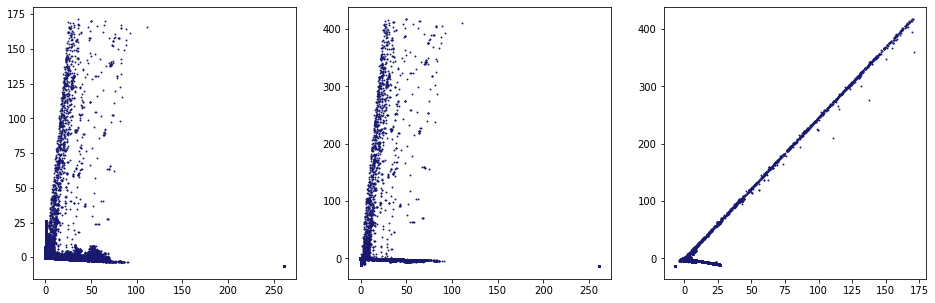

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
ax[0].scatter(principalDf['pc1'], principalDf['pc2'],  s=0.8, c='midnightblue')
ax[1].scatter(principalDf['pc1'], principalDf['pc3'],  s=0.8, c='midnightblue')
ax[2].scatter(principalDf['pc2'], principalDf['pc3'],  s=0.8, c='midnightblue')
plt.show(); fig.clf(); plt.close();

# Outliers && Normalization && PCA (résumé, deprecated)

In [ ]:
df_nout = cl.removeOutliers(df_ALL, threshold = 20, UFAMP_limit = 1e+6, RRKLD_limit = 2e+6)
X = cl.normalize(df_nout)

In [ ]:
pca = cl.getPCA(0.95, X)

In [66]:
Xpca, dfPca = cl.getXandDf(pca, X, ['pc1', 'pc2', 'pc3', 'pc4'])

In [67]:
del df_nout, X, pca
gc.collect()

14